# Linear Regression in Practice

This notebook is organized as a sequence of small exercises that you should work **in this notebook**. Some important tips:

 1. Make sure you **document** your solutions, don't just write code -- even if it works perfectly. Use the rich markup abilities of Jupyter to explain each of your solutions and analyze results.

 1. The exercises are all related, so it is a good idea to read ahead to see, for example, the features you might want your **pipeline** to have before implementing it.

 2. Don't change the structure of the notebook. Keep the overall organization as in the original.

 3. Feel free to export the notebook to a Jupyter .ipnb notebook and work on your own Jupyter installation.

 4. For the **final submission** you should submit an .ipnb file, so if you use Google Colaboratory you will need to **export** it to upload your submission.


**VERY IMPORTANT**: Make sure you "Save a copy in Drive" from the File menu so that you can save your changes.

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [1]:
##### NOTA: Elaborato svolto con Python 3.8.19

# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [2]:
# Your code here.
print(ds.DESCR) # descrizione sommaria del dataset
print("-----------------------------------------------------------------");
print(ds.keys()) #visualizzo le chiavi del dizionario
print("data available: " +  str(ds.data.shape)) # valuto il numero di variabili e di items del dataset all'interno di ds.data
print("feats: " + str(ds.feature_names))
print("targets: " + str(ds.target_names))
print("target values[0:5]: " + str(ds.target[0:5]))
print("-----------------------------------------------------------------");


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**Your Analysis**: Modify this Markdown cell with the results of your playing around in the above code cell. The point of Notebooks is to build self-documenting, executable, and reproducible analyses of your work -- so **document** on the way.

# Inspecting the Dataset

After loading the dataset into the variable `ds`, which is of type `Bunch` (essentially a specialized dictionary), we can begin inspecting it using the following commands:

- `print(ds.DESCR)`: Provides a summary description of the contained variables, their meaning, etc.
- `print(ds.keys())`: Displays the dictionary keys.
- `print("data available: " + str(ds.data.shape))`: Evaluates the number of explanatory variables (a term statisticians favor) and the number of records in the dataset within the n-dimensional array `ds.data`, yielding **8 variables in columns for 20,640 records**.

## Feature Names
The variable names are accessible via `ds.feature_names`; aligning with the description in `ds.DESCR`, we have:

- **`MedInc`**: Median income of a block
- **`HouseAge`**: Median age of houses in a block
- **`AveRooms`**: Average number of rooms per household
- **`AveBedrms`**: Average number of bedrooms per household
- **`Population`**: Population within a block
- **`AveOccup`**: Average household size
- **`Latitude`**: Block latitude
- **`Longitude`**: Block longitude

## Target Variables
The names of the target variables (in this case, only one) are provided in `ds.target_names`:

- **`MedHouseVal`**: Median house value for districts in California

Finally, the target variable values for each record in the dataset are stored in `ds.target`.

## Creating a Pandas DataFrame
These details will help us construct a Pandas **DataFrame** along with the target **Series**:

- In the `pd.DataFrame()` constructor, we pass the numerical values contained in `ds.data`, associating them with the names in `ds.feature_names`.
- To build the target series, we use the `pd.Series()` constructor.



### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [3]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Your code to build the DataFrame here (replace None)
df = pd.DataFrame(data=ds.data, columns=ds.feature_names) # creo dataframe pandas a partire dalle variabili esplicative in ds.data

# Your code to build the target Series here (replace None)
target = pd.Series(data=ds.target, name=ds.target_names[0]) #creo la Series target, dichiarando il nome della variabile target (in questo caso una sola)


### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [4]:
# Your code here.
print(df.describe())

import math
def Log10Scale(series):
    nan_values = np.full(shape= len(series), fill_value=math.nan)
    logseries = pd.Series(data=nan_values, index=series.index)
    id_pos = series[series > 0].index
    logseries[id_pos] = np.log10(series[id_pos])
    return logseries
    
log_min = Log10Scale(df.min())
log_max = Log10Scale(df.max())

tab_LogMinMax = pd.DataFrame({'log_min': log_min, 'log_max': log_max})
print(tab_LogMinMax)

# riassumo anche il contenuto della variabile target
target.describe()

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

**Your Analysis Here** (in Markdown).

# Data Scaling and Normalization

The variables exhibit values on different orders of magnitude. To improve understanding, the data has been transformed using a **logarithmic scale (base 10)** for minimum (`log_min`) and maximum (`log_max`) values. This highlights the more extreme ranges—such as in `Population` and `AveOccup`, and to a lesser extent in `AveRooms`—which could potentially make training problematic.

The **median income** of each block (`MedInc`) is likely expressed in **thousands of dollars**. The average number of rooms and bedrooms is provided per household, meaning `AveRooms` and `AveBedrooms` can take on very large values for blocks with few households and many vacant homes, such as **vacation areas**.

To facilitate the estimation process for **regression coefficients**, it is advisable to **normalize the data consistently**. This transformation will be applied later, first computing how to transform the data on the **training set**, and then applying the same transformation (using identical parameters from the training set) to the **test set** during prediction.


---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

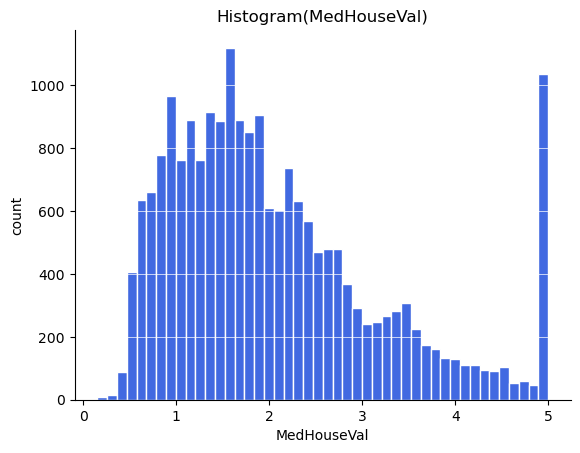

C:\Users\dario\AppData\Local\Temp\ipykernel_15860\2699092891.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(target, hist_kws=dict(edgecolor="white"))
C:\Users\dario\anaconda3\envs\ML-3_8_19\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


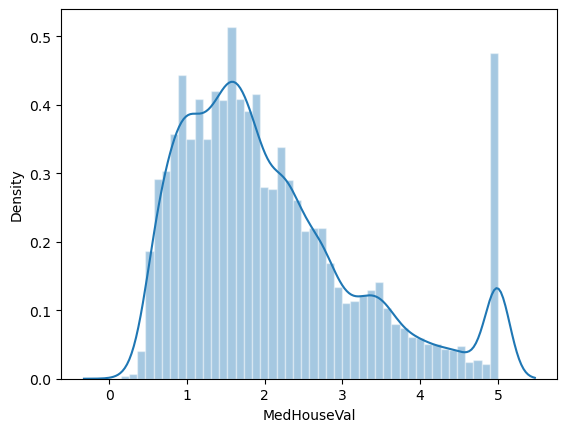

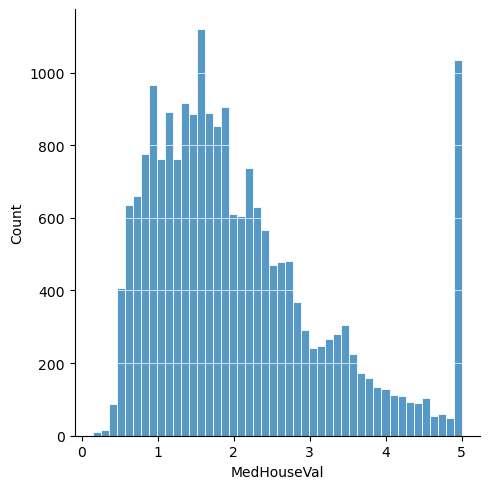

In [5]:
# Your visualization code here.

def FreedmanDiaconisBins(series):
    # Freedman–Diaconis rule (bin width bw)
    bw = 2*(series.quantile(0.75)-series.quantile(0.25))*(len(series))**(-1/3)
    nbins = math.ceil((series.max()-series.min())/bw)
    return nbins

plt.figure()
_ = plt.hist(target, bins=FreedmanDiaconisBins(target), edgecolor='white', color='royalblue')
plt.xlabel(target.name)
plt.ylabel('count'); plt.title('Histogram(' + target.name + ')')
plt.grid(axis='y', color='white', linewidth=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# In addition to histograms, try out the Seaborn function distplot
import seaborn as sns

plt.figure()
_ = sns.distplot(target, hist_kws=dict(edgecolor="white"))
# nuova funzione al posto di distplot (deprecated)
_ = sns.displot(data=target, edgecolor='white')
plt.grid(axis='y', color='white', linewidth=0.5)
plt.show()

**Your Analysis Here**.

# Analysis of House Prices and Outliers

The house prices (`MedHouseVal`) suddenly **saturate in the last bin**, meaning that values above 5 have been **capped** at this level within the dataset. This fact was not easily detectable using simple statistics from `target.describe`.  
Additionally, the distribution exhibits a **steep drop** for `MedHouseVal < 0.5`.

## Skewed Distributions and Upper Limits
As shown in the histograms in the following cells (**Exercise 2b**), many explanatory variables have **long tails to the right**. Moreover, besides `MedHouseVal`, several variables are **capped**:

- **`MedInc`**, ranging between 0.5 and 15 (probably expressed in **$10^3**);
- **`HouseAge`**, ranging between 1 and 52 (especially for values **≥ 52**).

## Outliers in the Dataset
Furthermore, some attributes exhibit **outliers**, as they show **very narrow distributions** despite a broader range in data. Specifically:

- `Population`
- `AveRooms`
- `AveBedrms`
- `AveOccup`

For each of these variables, **the upper 0.5% of the data has been removed**, solely to improve visualization of the distribution for most of the dataset.

In total, **1.54% of the data was identified as outliers** based on histogram analysis, reducing the dataset size to **20,322 records**.



### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!



Preparing histogram plots for full dataset...



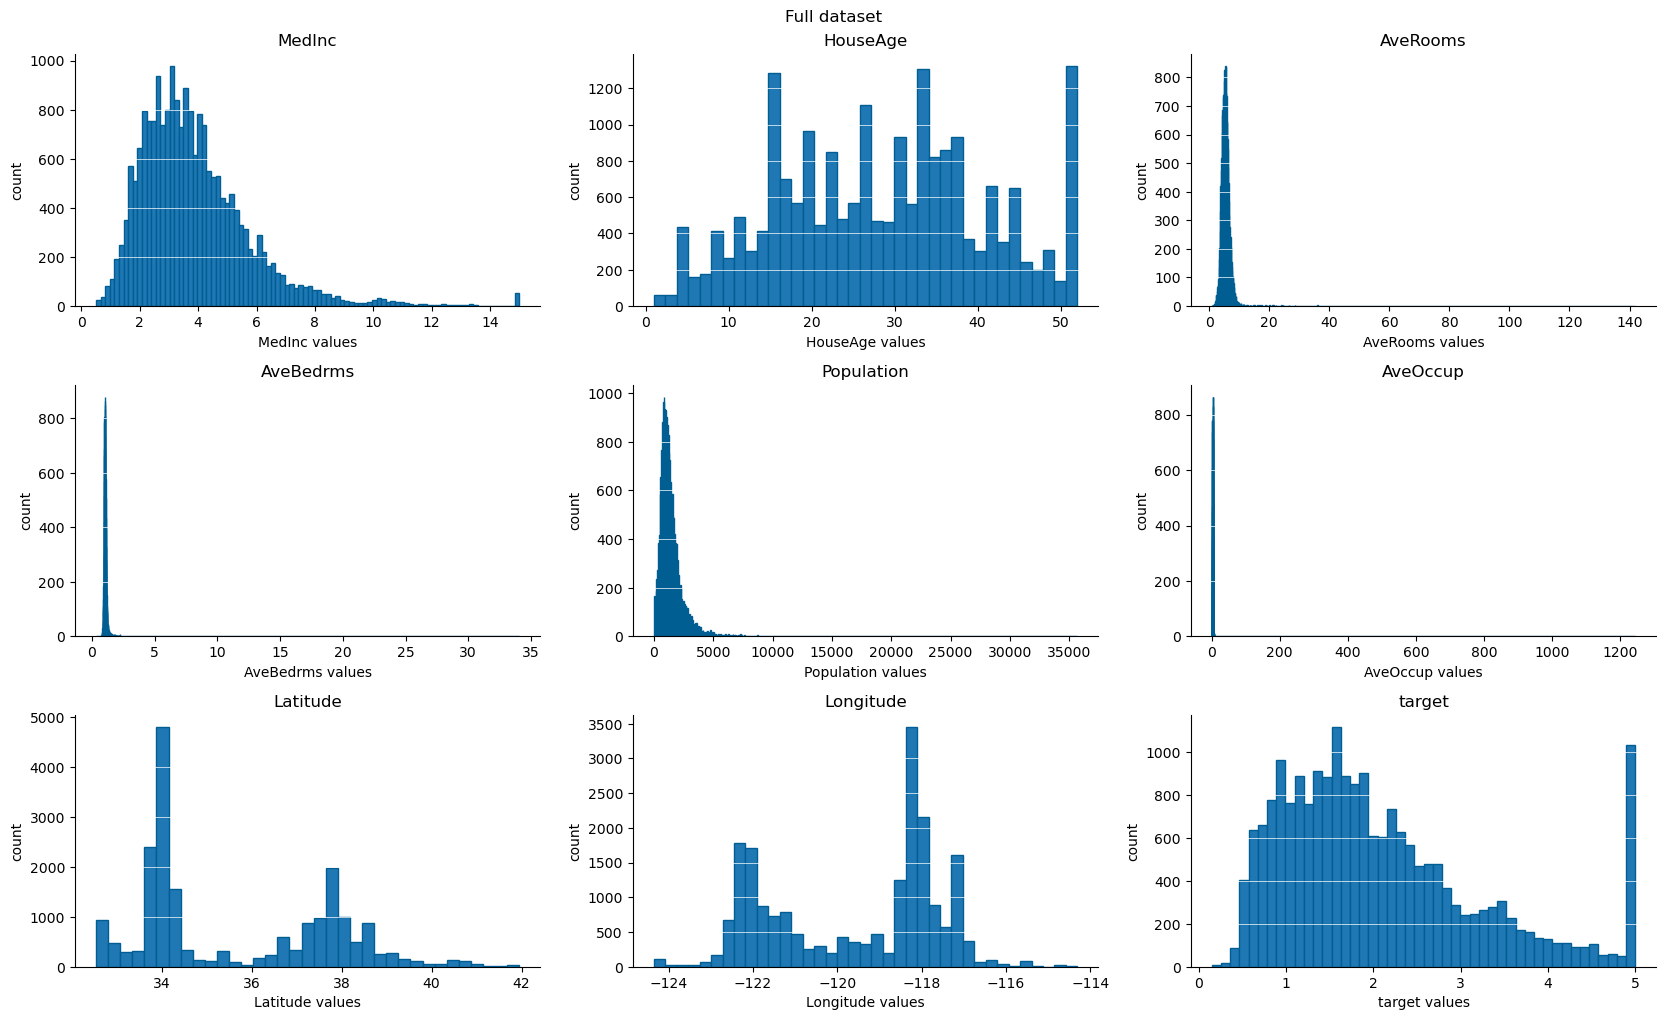


Preparing histogram plots for inliers...



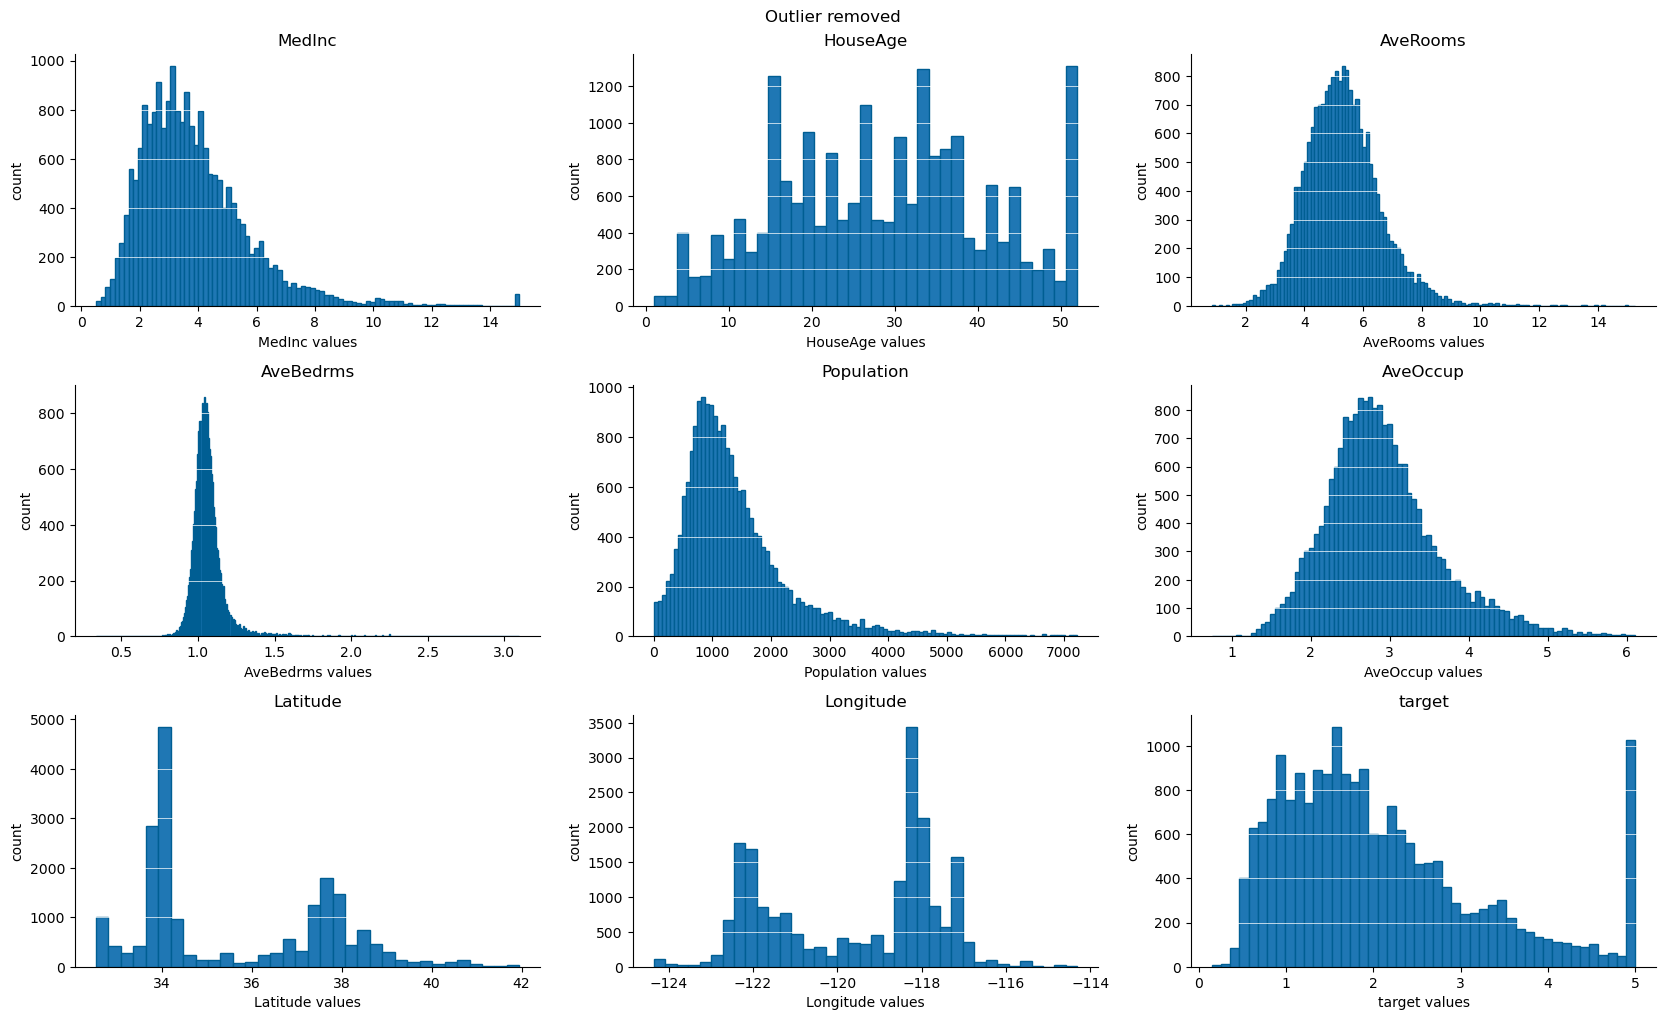

outliers perc: 1.5406976744185954%


In [6]:
# Your code here.
# ATTENZIONE: IL PLOT DEGLI ISTOGRAMMI RICHIEDE DIVERSO TEMPO, PAZIENTARE...

def HistSubPlot(df, plt_rows, plt_cols, plt_width_cm, plt_height_cm):
    #conversione in inches
    plt_width = plt_width_cm*2.54 
    plt_height = plt_height_cm*2.54
    
    fig, axes = plt.subplots(plt_rows, plt_cols, 
                             figsize=(plt_cols*plt_width, plt_rows*plt_height))
    for r in range(plt_rows):
        for c in range(plt_cols):
            
            k = r*plt_cols + c
            col_df = df.iloc[:,k]
            nbins = FreedmanDiaconisBins(col_df)
            lab = col_df.name
            
            ax = axes[r,c]
            _ = col_df.plot.hist(ax=ax, color='#1f77b4', edgecolor='#005e93', bins=nbins)
            _ = ax.set_xlabel(lab + " values"); 
            _ = ax.set_ylabel('count')
            _ = ax.set_title(lab)
            _ = ax.grid(axis='y', color='white', linewidth=0.5)
            _ = ax.spines['top'].set_visible(False)
            _ = ax.spines['right'].set_visible(False)


# Viene aggiunta anche la variabile target per visualizzare come varia
# a seguito della rimozione dei record con outliers
dfInliers = df.copy()
dfInliers['target'] = target

print("\nPreparing histogram plots for full dataset...\n")
plt_rows = 3
plt_cols = 3
plt_width = 2.2 
plt_height = plt_width*0.618
HistSubPlot(dfInliers, plt_rows, plt_cols, plt_width, plt_height)
plt.suptitle('Full dataset'); plt.tight_layout()
plt.show()

# Si notano distribuzioni molto strette nonostante il range dei dati sia più ampio:
# outliers per Population, AveRooms, AveBedrms, AveOccup
# Allo scopo di visualizzare meglio la distribuzione degli inlier per tali variabili,
# viene rimosso dalla coda superiore lo 0.5% dei dati
# Complessivamente gli outliers selezionati sono lo 1.54%, 
# portando il dataset a 20322 records

print("\nPreparing histogram plots for inliers...\n")

qthr = 0.995
idoutPopulation = df.Population[df.Population > df.Population.quantile(qthr)].index
idoutAveRooms   = df.AveRooms[df.AveRooms  > df.AveRooms.quantile(qthr)].index
idoutAveBedrms  = df.AveBedrms[df.AveBedrms > df.AveBedrms.quantile(qthr)].index
idoutAveOccup   = df.AveOccup[df.AveOccup  > df.AveOccup.quantile(qthr)].index
idout = np.unique(np.concatenate((idoutPopulation, idoutAveRooms, idoutAveBedrms, idoutAveOccup)))

dfInliers = dfInliers.drop(idout)
HistSubPlot(dfInliers, plt_rows, plt_cols, plt_width, plt_height)
plt.suptitle('Outlier removed'); plt.tight_layout()
plt.show()

print("outliers perc: " + str(100-(dfInliers.shape[0]/df.shape[0])*100) + "%")
    

---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.


Preparing target maps...



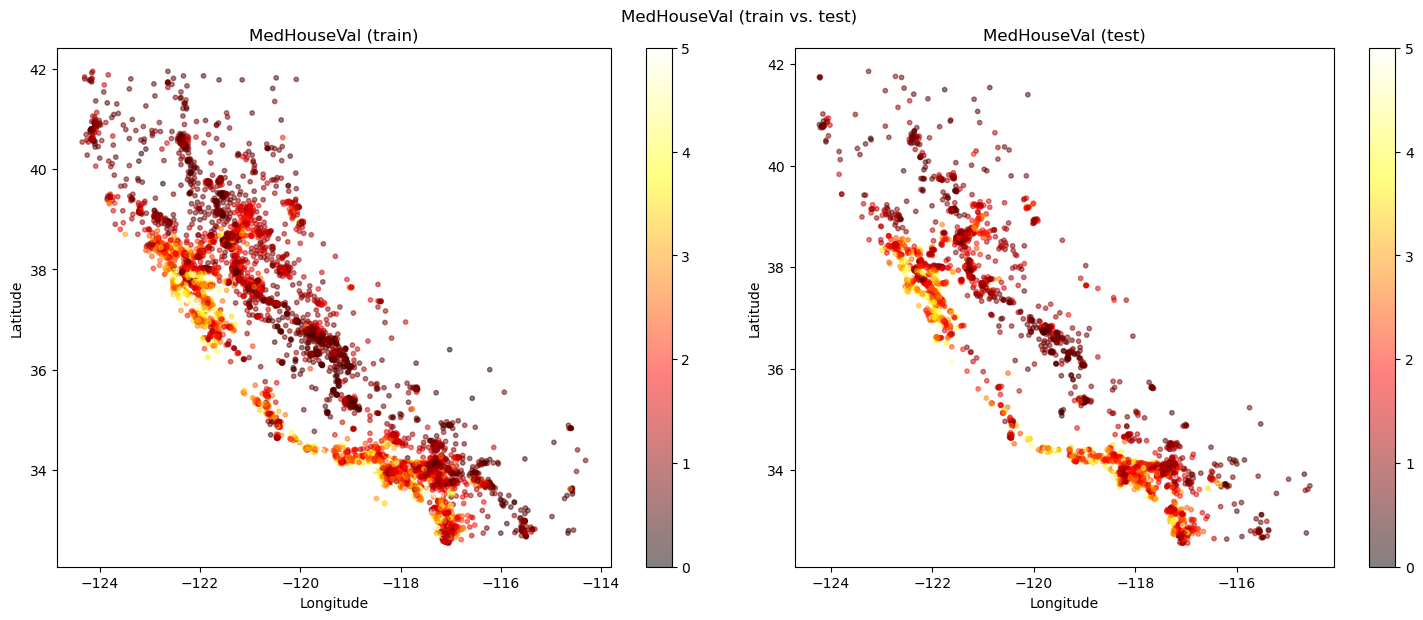


Preparing correlation heatmaps...



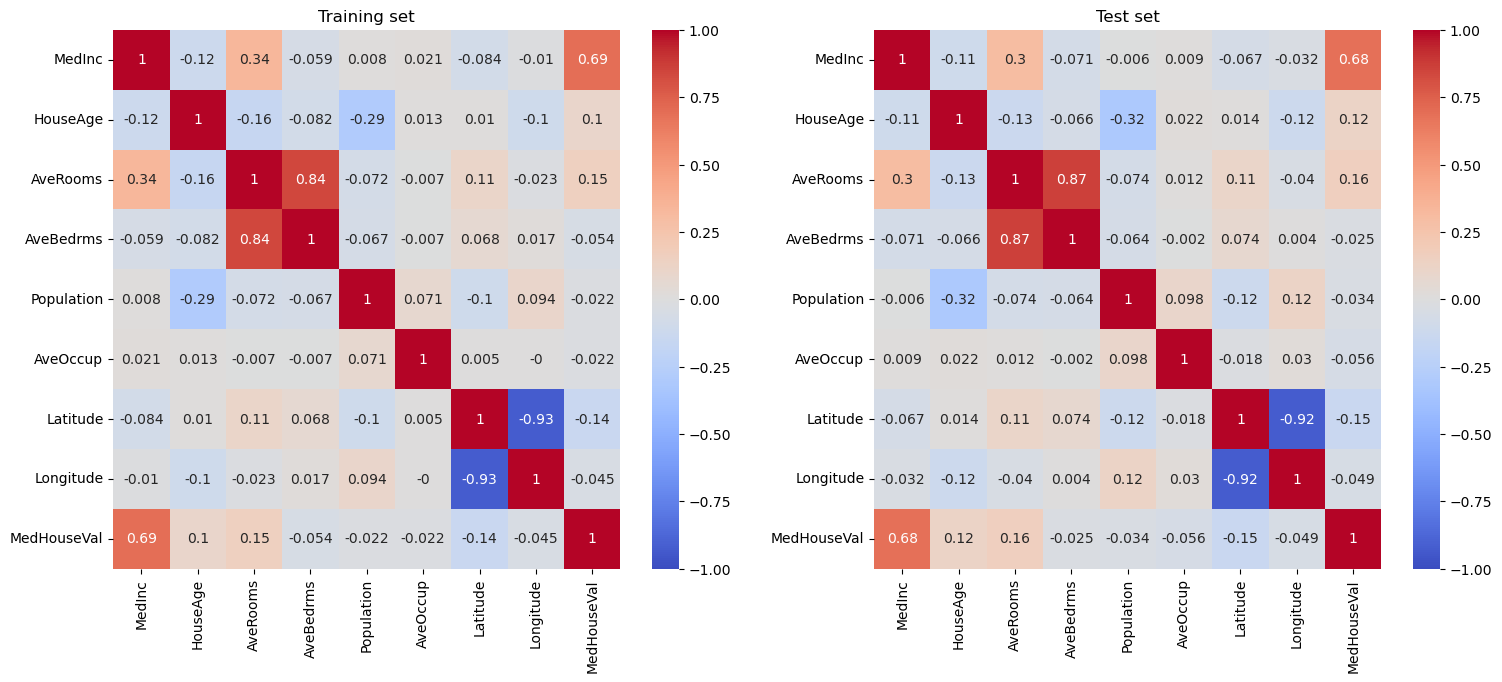


Preparing pairplot for training set...



C:\Users\dario\anaconda3\envs\ML-3_8_19\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dario\AppData\Local\Temp\ipykernel_15860\959345591.py:41: UserWarning: The figure layout has changed to tight
  g = sns.pairplot(Xtry.iloc[::skip_n+1], diag_kind='kde'); g.fig.suptitle('Training set\n', fontsize=14); g.fig.tight_layout()


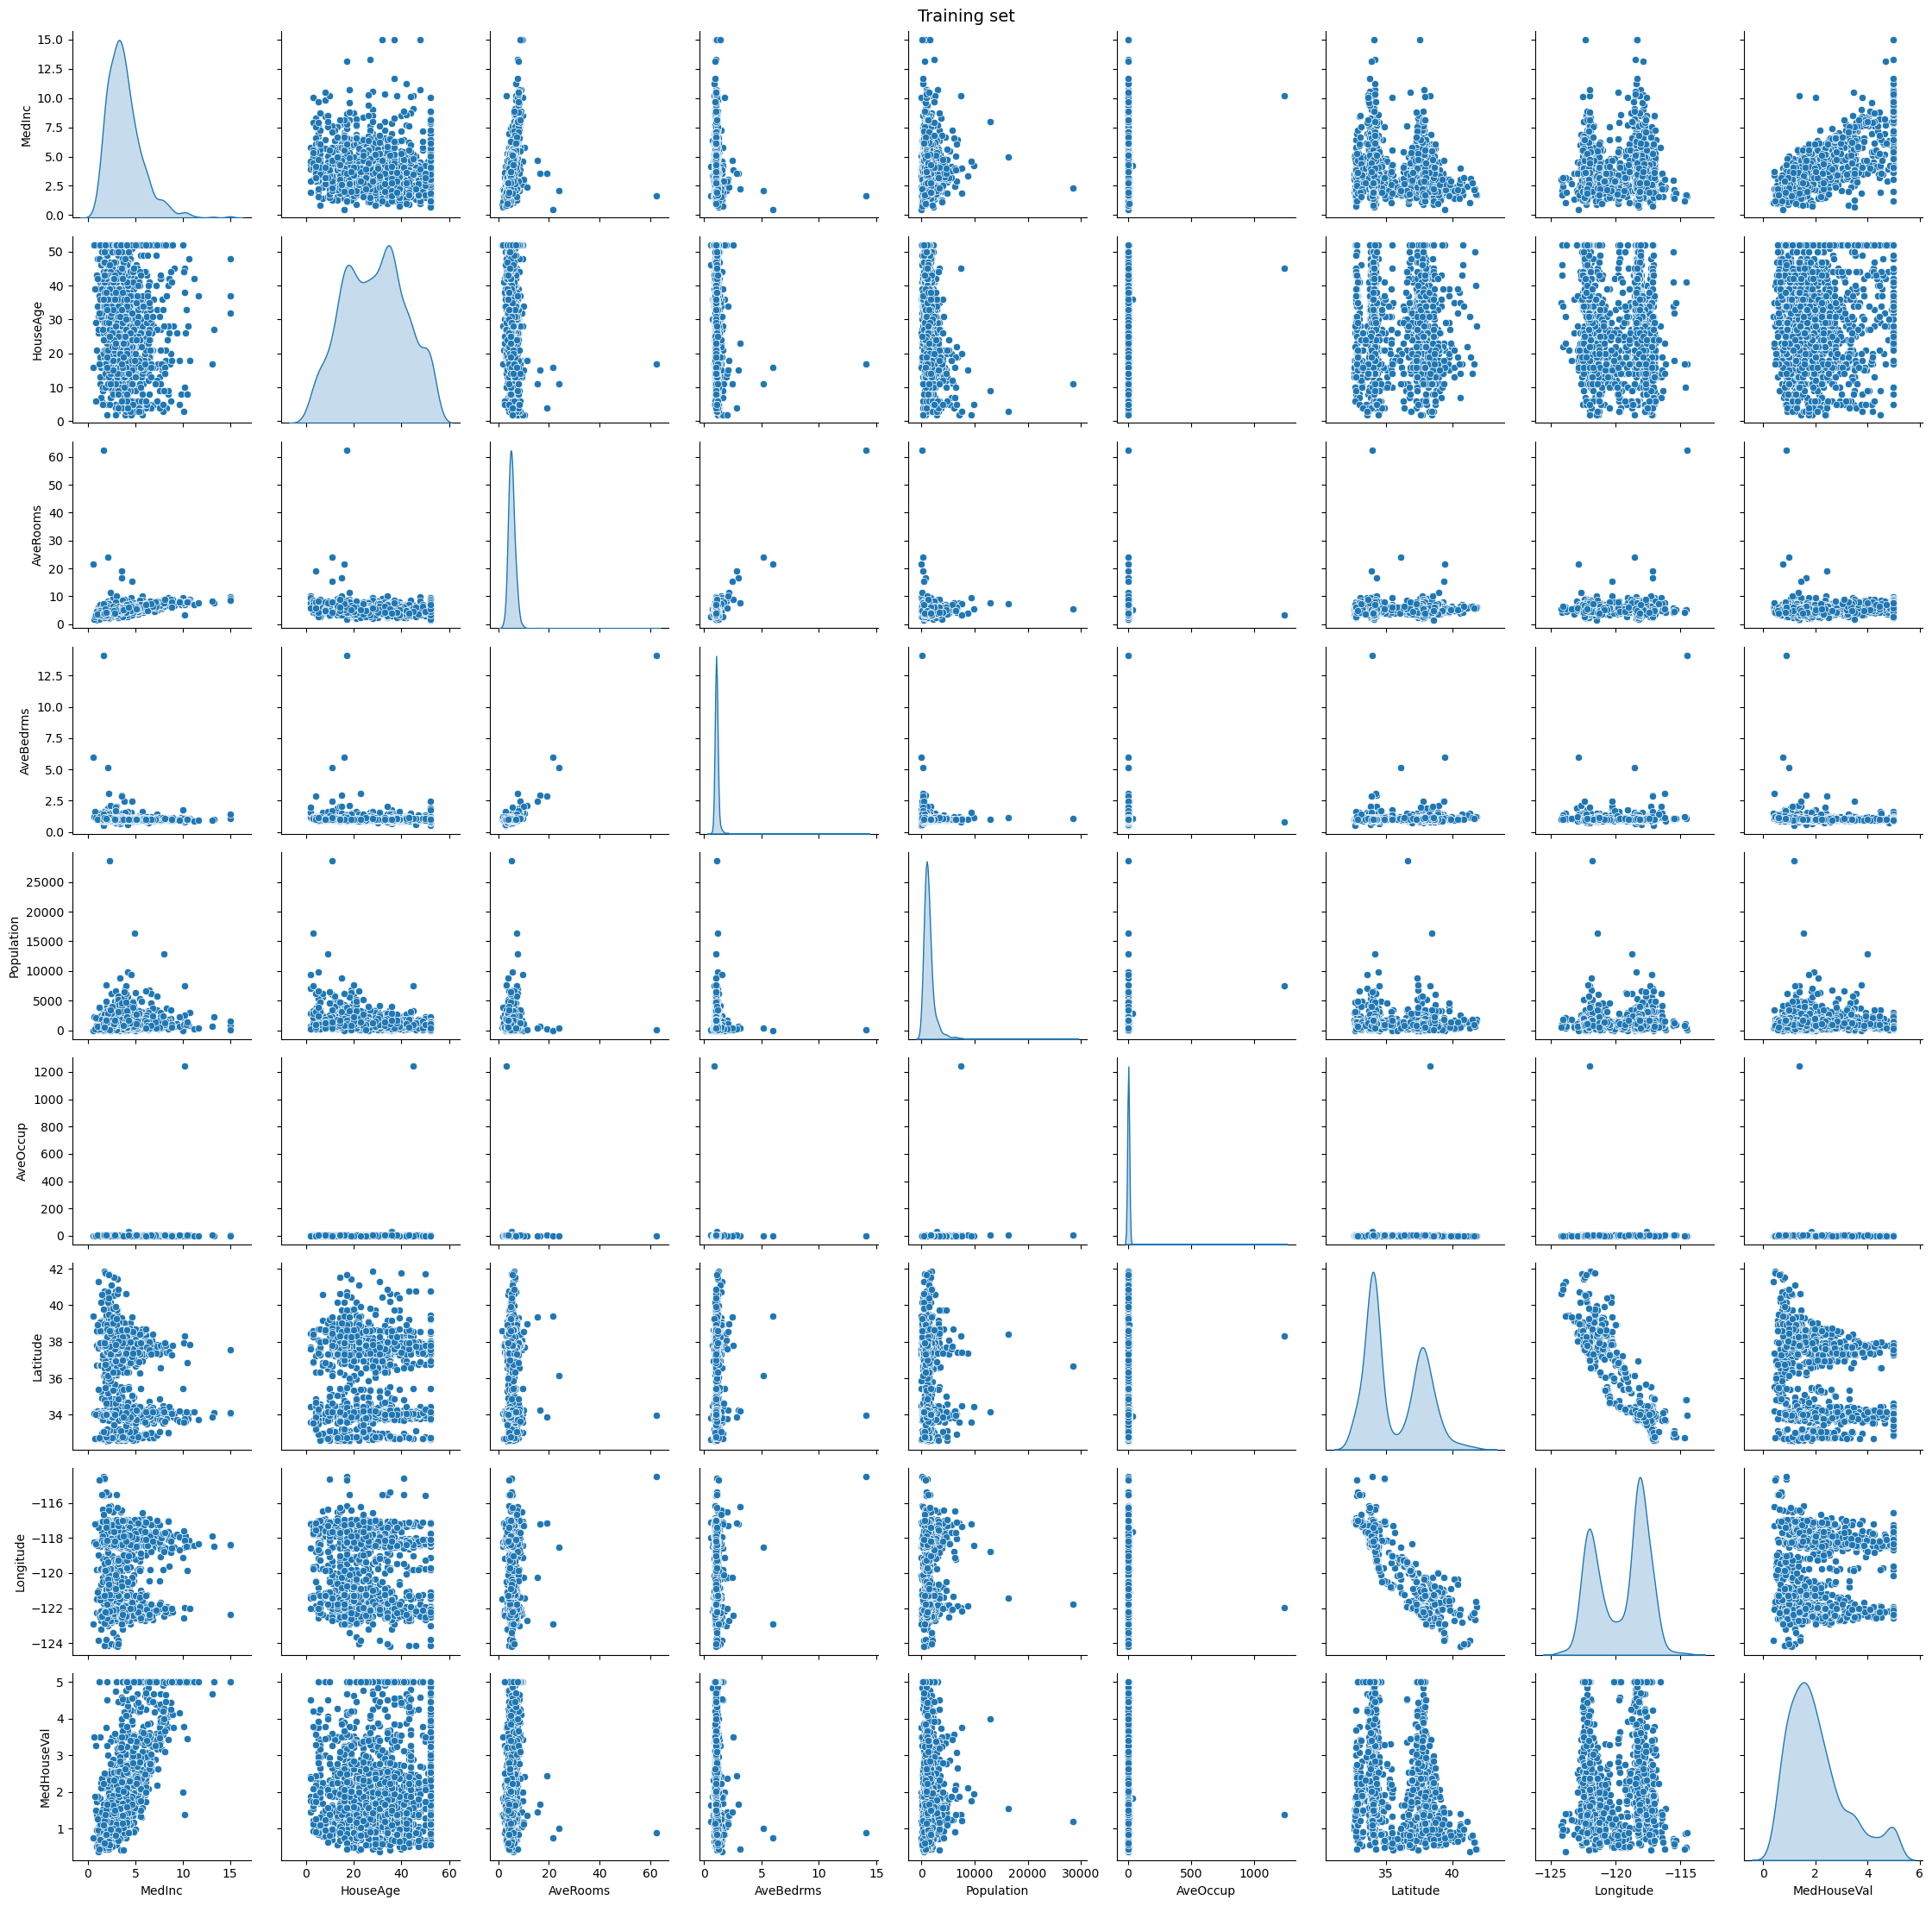


Preparing pairplot for test set...



C:\Users\dario\anaconda3\envs\ML-3_8_19\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dario\AppData\Local\Temp\ipykernel_15860\959345591.py:44: UserWarning: The figure layout has changed to tight
  g = sns.pairplot(Xtey.iloc[::skip_n+1], diag_kind='kde'); g.fig.suptitle('Test set\n', fontsize=14); g.fig.tight_layout()


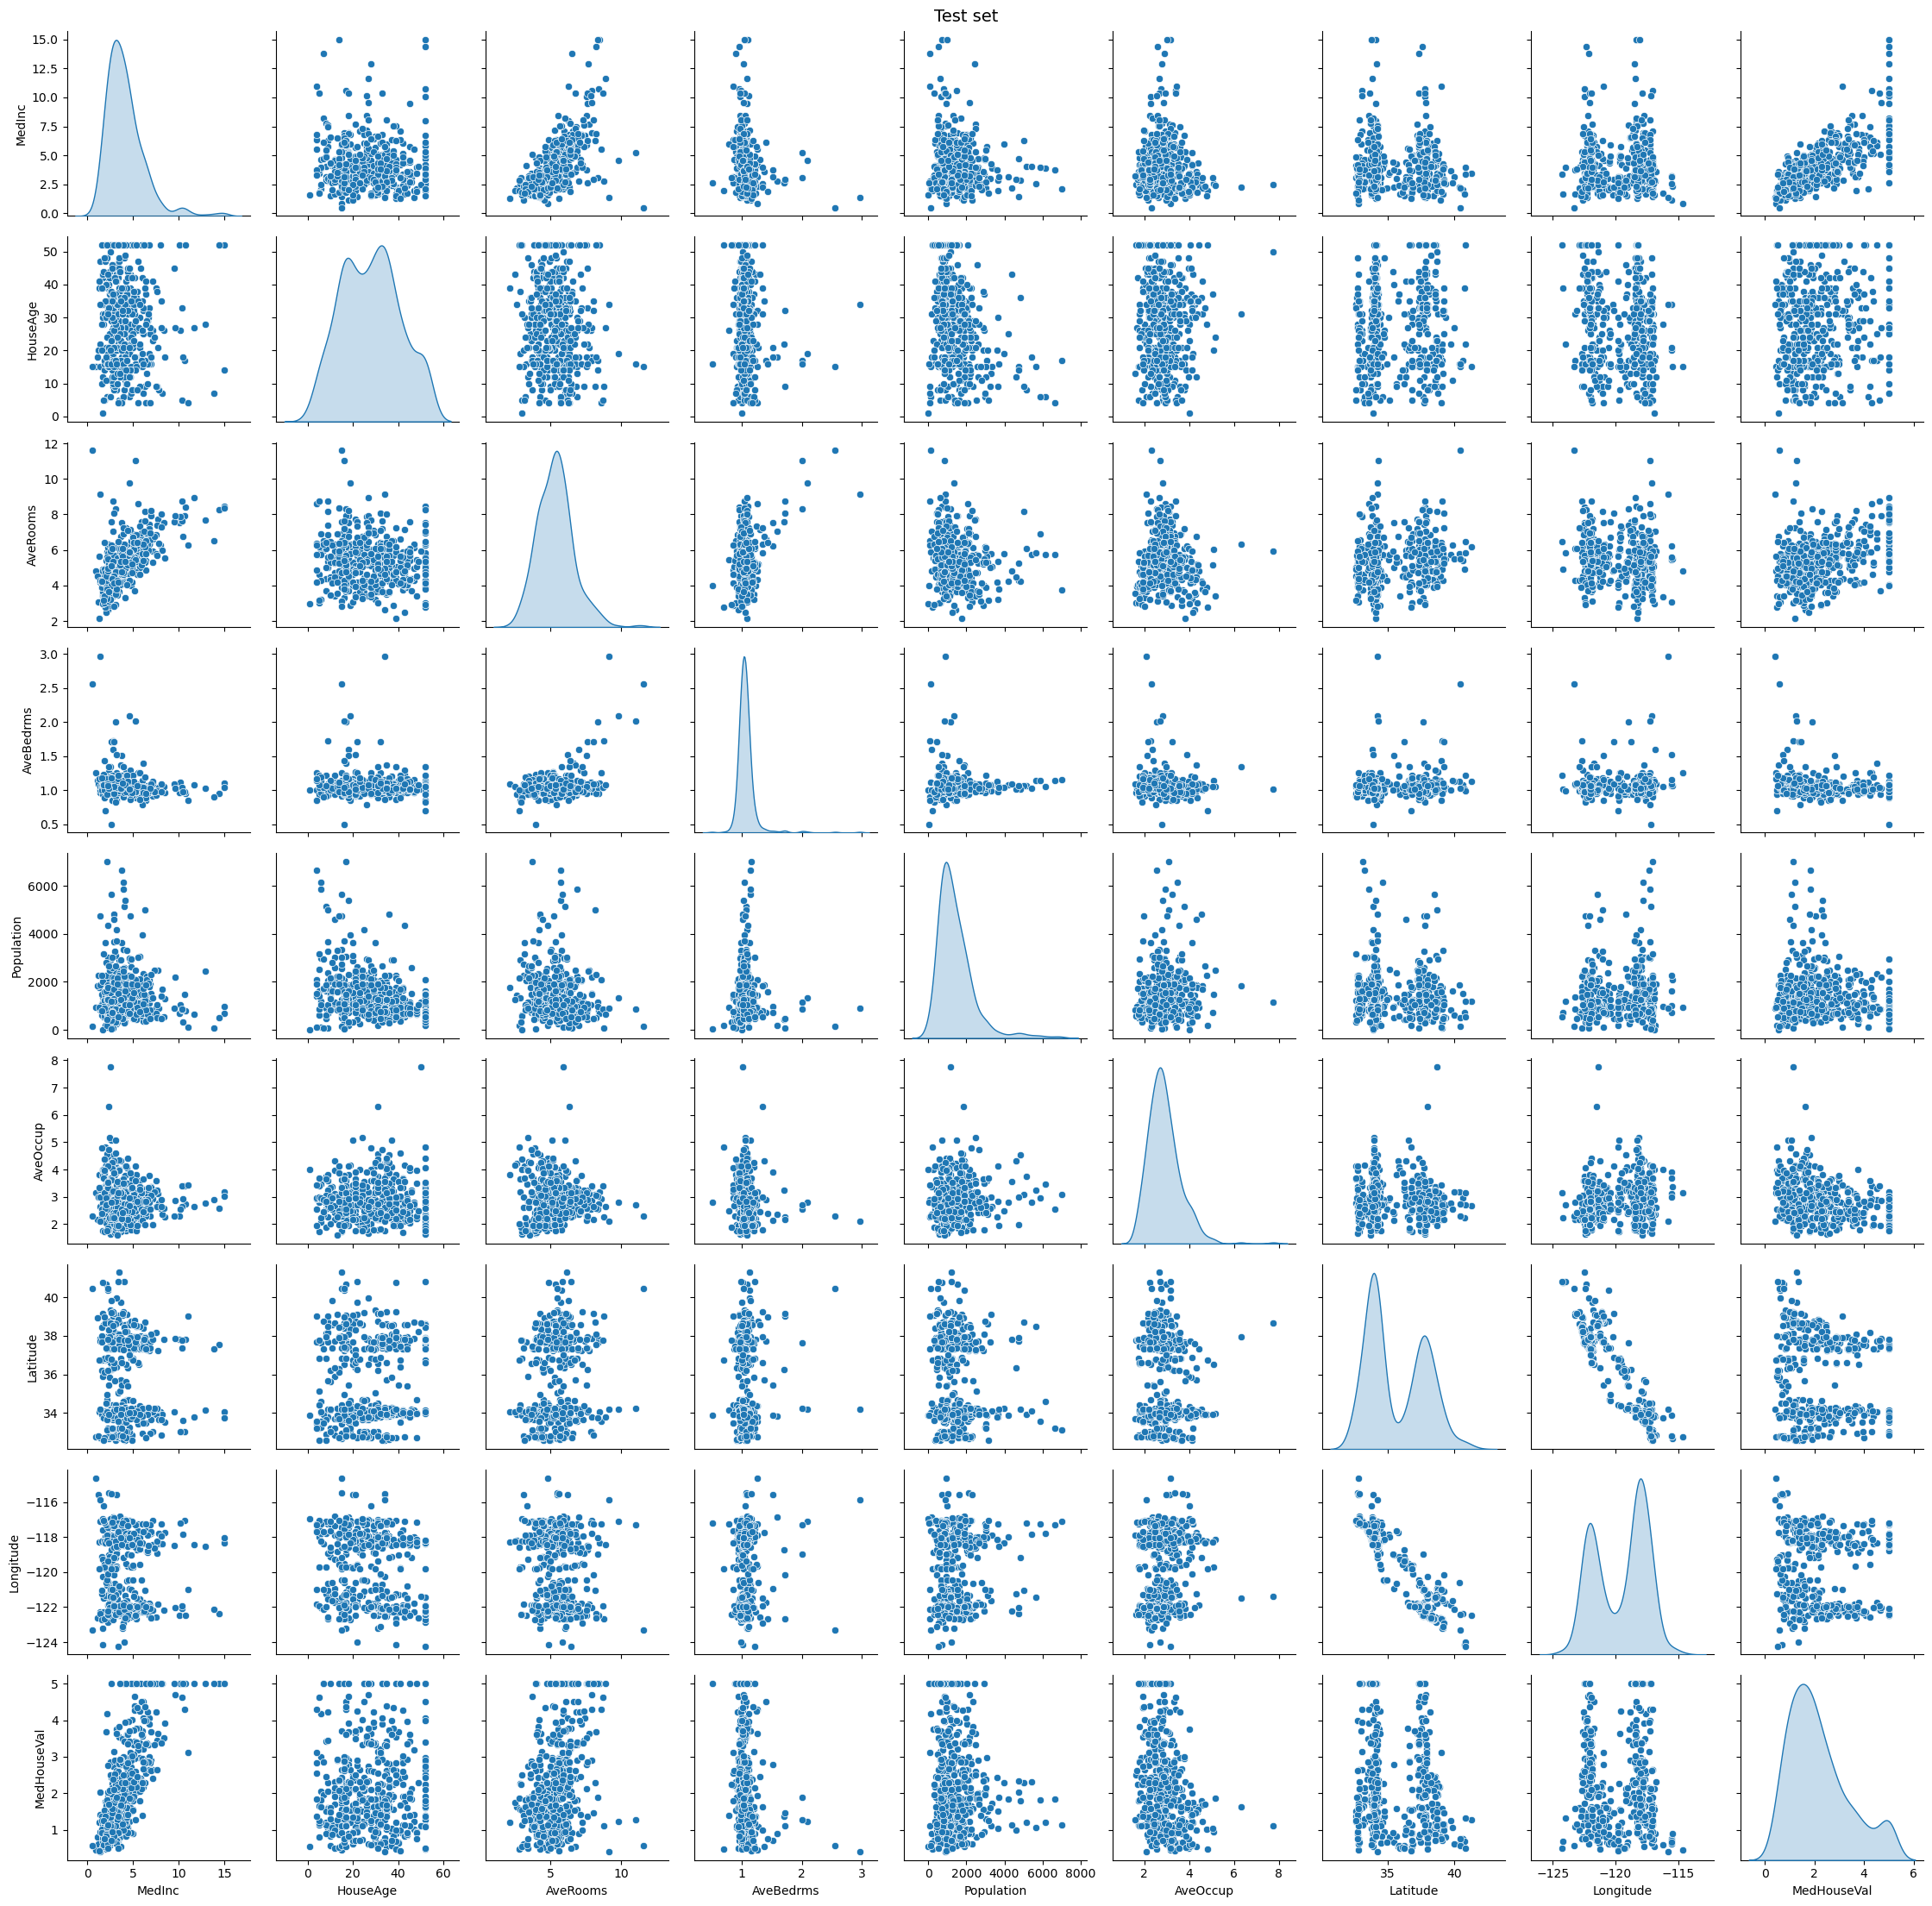

In [7]:
# Your code here.
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split -- replace the [None]*4 with your code.
# (Xtr, Xte, ytr, yte) = [None]*4
split_seed = 11
(Xtr, Xte, ytr, yte) = train_test_split(df, target, test_size=0.25, random_state=split_seed)

# visualizzo i dati splittati 

# verifico similitudine dei due set sul target MedHouseVal rispetto alla disposizione geografica 
print("\nPreparing target maps...\n")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sc = axes[0].scatter(Xtr.Longitude, Xtr.Latitude, s=10, c=ytr, cmap='hot', alpha=0.5, vmin=0, vmax=5); plt.colorbar(sc)
_  = axes[0].set_xlabel('Longitude'); _= axes[0].set_ylabel('Latitude')
_  = axes[0].set_title('MedHouseVal (train)')
_  = axes[0].set_aspect('equal')
sc = axes[1].scatter(Xte.Longitude, Xte.Latitude, s=10, c=yte, cmap='hot', alpha=0.5, vmin=0, vmax=5); plt.colorbar(sc)
_  = axes[1].set_xlabel('Longitude'); _= axes[1].set_ylabel('Latitude')
_  = axes[1].set_title('MedHouseVal (test)')
_  = axes[1].set_aspect('equal')
plt.suptitle('MedHouseVal (train vs. test)'); plt.tight_layout()
plt.show()

# verifico similitudine dei due set tramite confronto delle matrici di correlazione e degli scatter plots

Xtry = Xtr.copy(); Xtry['MedHouseVal'] = ytr
Xtey = Xte.copy(); Xtey['MedHouseVal'] = yte

print("\nPreparing correlation heatmaps...\n")
corr_try = Xtry.corr().round(3)
corr_tey = Xtey.corr().round(3)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
_ = sns.heatmap(corr_try, annot=True,cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0]); axes[0].set_title('Training set')
_ = sns.heatmap(corr_tey, annot=True,cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1]); axes[1].set_title('Test set')
plt.show()

# ATTENZIONE: IL PLOT DEGLI SCATTER PLOTS RICHIEDE DIVERSO TEMPO, PAZIENTARE...
print("\nPreparing pairplot for training set...\n")
skip_n = 10
g = sns.pairplot(Xtry.iloc[::skip_n+1], diag_kind='kde'); g.fig.suptitle('Training set\n', fontsize=14); g.fig.tight_layout()
plt.show()
print("\nPreparing pairplot for test set...\n")
g = sns.pairplot(Xtey.iloc[::skip_n+1], diag_kind='kde'); g.fig.suptitle('Test set\n', fontsize=14); g.fig.tight_layout()
plt.show()

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


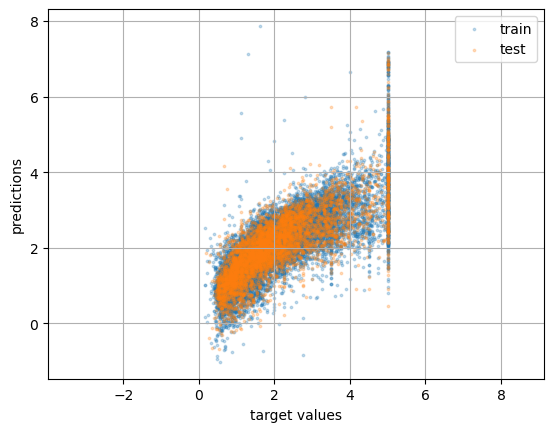

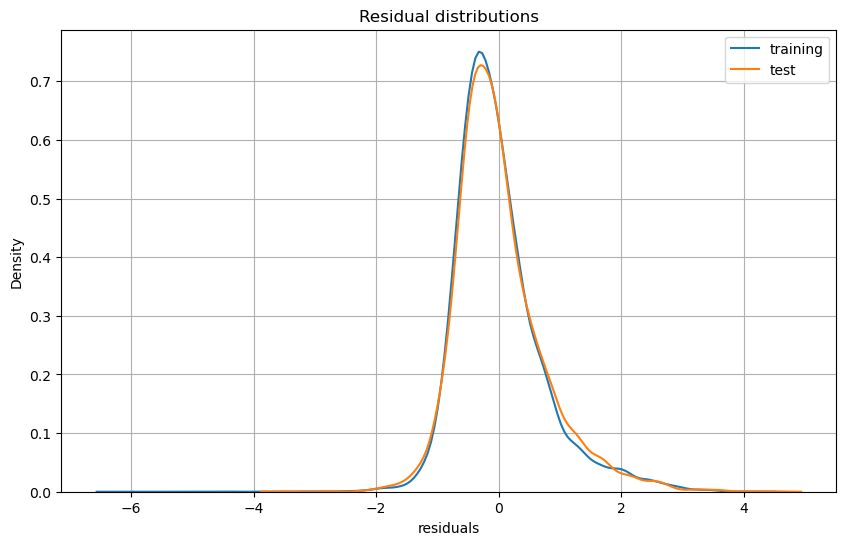

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrs = pd.DataFrame(scaler.fit_transform(Xtr.values), columns=Xtr.columns)
Xtes = pd.DataFrame(scaler.transform(Xte.values), columns=Xte.columns)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) 
model.fit(Xtrs,ytr)
pred_tr = model.predict(Xtrs)
pred_te = model.predict(Xtes)

plt.scatter(y=pred_tr, x=ytr, alpha=0.25, s=3, label='train')
plt.scatter(y=pred_te, x=yte, alpha=0.25, s=3, label='test')
plt.ylabel('predictions'); plt.xlabel('target values'); plt.legend() #plt.title('Residual plot');
plt.axis('equal')
plt.grid()
plt.show()

err_tr = ytr.values - pred_tr;
err_te = yte.values - pred_te;
plt.figure(figsize=(10, 6)) 
sns.kdeplot(err_tr, label='training')
sns.kdeplot(err_te, label='test')
plt.title('Residual distributions')
plt.xlabel('residuals')
plt.grid()
plt.legend()
plt.show()

### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [9]:
# Your code here.
def PredictionErrors(model, data, target):
    N = len(target)
    ypred = model.predict(data)
    residuals = (target-ypred).values;
    #rmse = math.sqrt(sum(residuals**2)/N)
    #mas = sum(abs(residuals))/N
    rmse = math.sqrt(np.mean(residuals**2))
    mae = np.mean(abs(residuals))
    return (rmse, mae)

model.fit(Xtrs,ytr)
rmse_train, mae_train = PredictionErrors(model, Xtrs, ytr)
rmse_test, mae_test = PredictionErrors(model, Xtes, yte)
print(f"TRAIN: rmse={rmse_train} mae={mae_train}")
print(f"TEST:  rmse={rmse_test} mae={mae_test}")

#-------------------------------------------------------------------------------------------------------------------
#  What if you change the proportion of training to test data in your splits?
#-------------------------------------------------------------------------------------------------------------------
print("________________________________________")
print("train       TRAIN              TEST ")
print("-----  ---------------   ---------------")
print("%      rmse    mae       rmse    mae")
print("________________________________________")
for perc in np.arange(0.95, 0.49, -0.05):
    (Xtr, Xte, ytr, yte) = train_test_split(df, target, train_size=perc)
    Xtrs = pd.DataFrame(scaler.fit_transform(Xtr.values), columns=Xtr.columns)
    Xtes = pd.DataFrame(scaler.transform(Xte.values), columns=Xte.columns)
    model.fit(Xtrs,ytr)
    rmse_train, mae_train = PredictionErrors(model, Xtrs, ytr)
    rmse_test, mae_test = PredictionErrors(model, Xtes, yte)
    print(f"{perc:.2f}   {rmse_train:.5f} {mae_train:.5f}   {rmse_test:.5f} {mae_test:.5f}")


TRAIN: rmse=0.7219059604371096 mae=0.5282589656069631
TEST:  rmse=0.7314471802153016 mae=0.537892792364812
________________________________________
train       TRAIN              TEST 
-----  ---------------   ---------------
%      rmse    mae       rmse    mae
________________________________________
0.95   0.72475 0.53187   0.71190 0.52146
0.90   0.72550 0.53168   0.71158 0.52568
0.85   0.72274 0.53053   0.73235 0.53304
0.80   0.72581 0.53288   0.72281 0.51908
0.75   0.72248 0.53085   0.72954 0.53221
0.70   0.72454 0.53164   0.72334 0.52985
0.65   0.72203 0.52838   0.73314 0.53136
0.60   0.71374 0.52379   0.74210 0.54233
0.55   0.72399 0.53248   0.72639 0.53000
0.50   0.72928 0.53526   0.72023 0.53075


**Your Analysis Here**: Why is the performance on the train set different than that on the test split? What if you change the proportion of training to test data in your splits?

Actually, they do not seem to differ much, as can be seen, for example, from the estimation of the residual distribution, where the curve obtained on the training set is very similar to the one built on the test set.

This indicates that the training set and the test set have been evenly split, as already evidenced by both the correlation matrices and the pairplots in the case of a 75% split. Furthermore, the linear model estimated on the training set exhibits a comparable behavior (for better or worse) on the test set.

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

TRAIN: rmse=0.7270861747107785 mae=0.5339185796062752
TEST:  rmse=0.7173214155241939 mae=0.5263570425459487


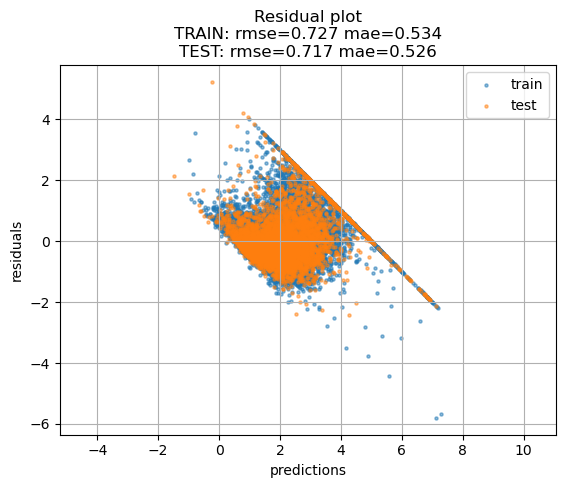

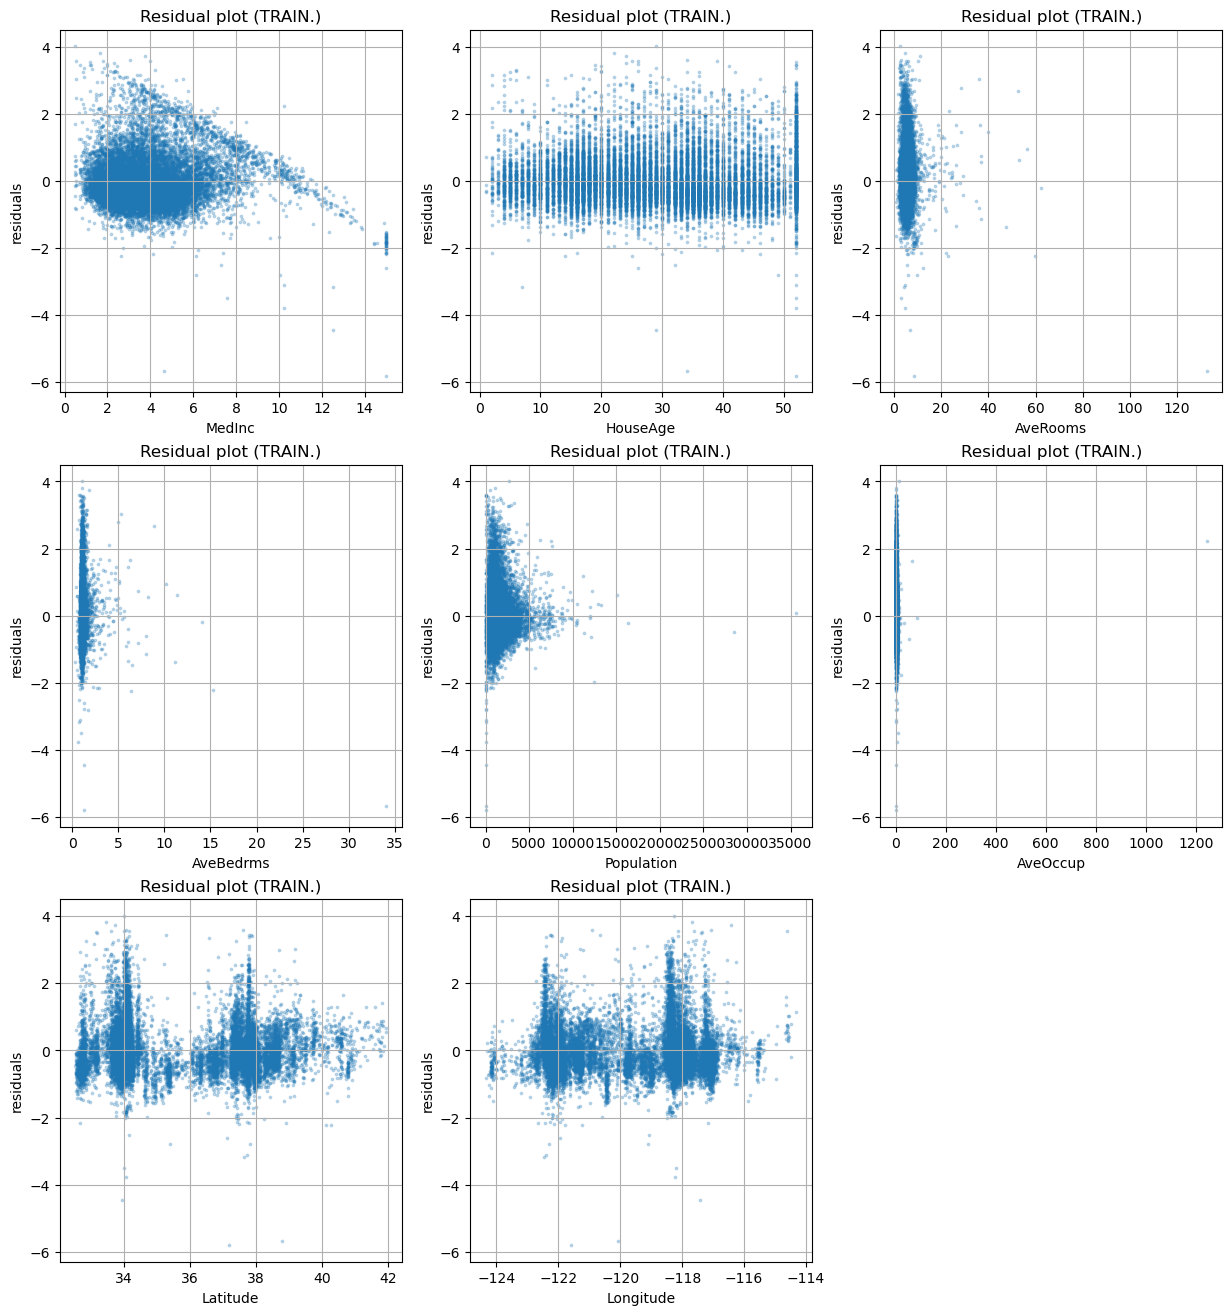

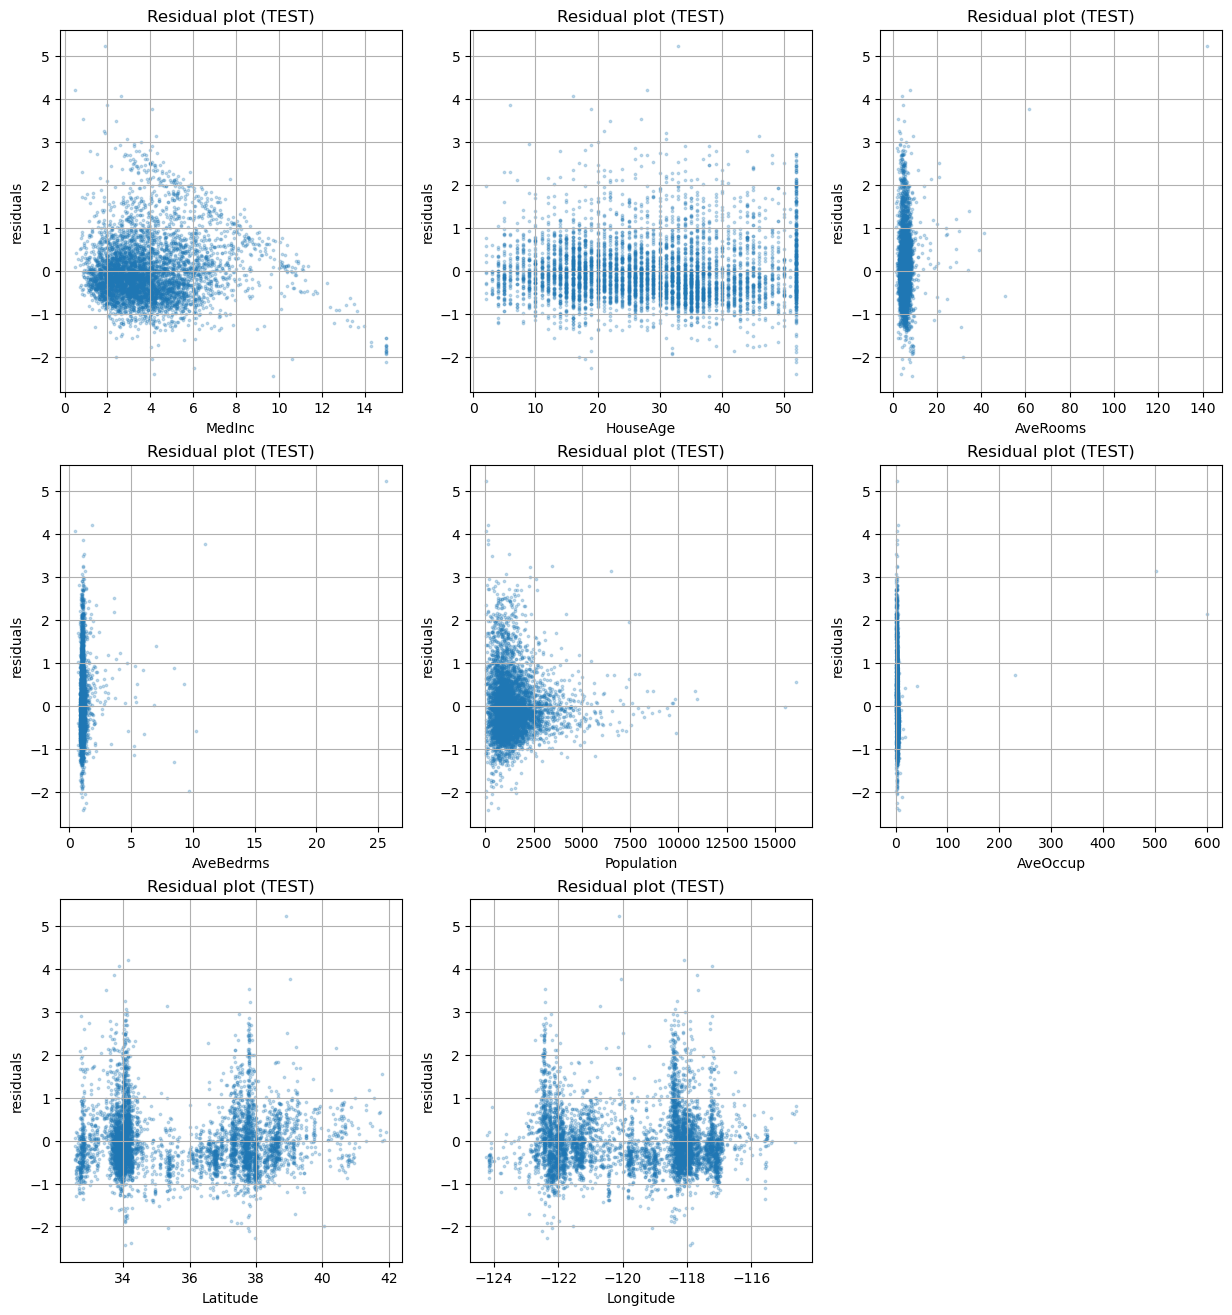

In [10]:
# Your code here.
def PredictionResidualsDF(model, data, target):
    pred = model.predict(data)
    res = (target-pred);
    data = {'pred': pred, 'res': res}
    df = pd.DataFrame(data)
    return df


def ResidualPlots(prederr_train, prederr_test, subtitle=""):
    plt.scatter(x=prederr_train.pred, y=prederr_train.res, alpha=0.5, s=5, label='train')
    plt.scatter(x=prederr_test.pred,  y=prederr_test.res,  alpha=0.5, s=5, label='test')
    plt.xlabel('predictions'); plt.ylabel('residuals'); 
    plt.title('Residual plot' + subtitle); 
    plt.grid(); plt.legend()
    plt.axis('equal')
    plt.show()

def ResidualPairPlots(X, y, subtitle=""):
    plt.figure(figsize=(15, 16))
    L = X.shape[1]
    l = math.ceil(math.sqrt(L))
    for p in range(0, L):
        plt.subplot(l, l, p+1)
        plt.scatter(X.iloc[:, p], y, alpha=0.25, s=3)
        plt.xlabel(X.columns[p]); plt.ylabel('residuals'); 
        plt.title('Residual plot' + subtitle); 
        plt.grid();
    plt.show()

    

# ripristino la percentuale iniziale di split
(X_train, X_test, y_train, y_test) = train_test_split(df, target, test_size=0.25)
model = LinearRegression(fit_intercept=True) 
#scaler = StandardScaler()
#X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X_test.columns)
scaler = StandardScaler(); scaler.set_output(transform='pandas')
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

model.fit(X_train_scaled,y_train)
rmse_train, mae_train = PredictionErrors(model, X_train_scaled, y_train)
rmse_test, mae_test = PredictionErrors(model, X_test_scaled, y_test)
print(f"TRAIN: rmse={rmse_train} mae={mae_train}")
print(f"TEST:  rmse={rmse_test} mae={mae_test}")

prederr_train = PredictionResidualsDF(model, X_train_scaled, y_train)
prederr_test = PredictionResidualsDF(model, X_test_scaled, y_test)
subtit = f"\nTRAIN: rmse={rmse_train:.3f} mae={mae_train:.3f}\n" +\
         f"TEST: rmse={rmse_test:.3f} mae={mae_test:.3f}"
ResidualPlots(prederr_train, prederr_test, subtit)
ResidualPairPlots(X_train, prederr_train.res, subtitle=" (TRAIN.)")
ResidualPairPlots(X_test, prederr_test.res, subtitle=" (TEST)")


**Your Analysis Here**

# Residual Plot Analysis

The ideal scenario in a **residual plot** is a **random dispersion of residuals** around the zero line on the y-axis. This indicates that the residuals are independent of the predicted values, and there is no systematic pattern in the errors, suggesting that the assumptions of the regression model are satisfied.

## Observations from the Residual Plot

The **residual plot of residuals vs. predicted values** instead exhibits a **declining linear trend** along with a **slight upward curvature** as predicted values increase:

- The **declining "band-like" trend** is likely due to **clipping** of the target variable `MedHouseVal`, which was artificially **capped** at values above 5 and limited below by the **sharp drop** in its distribution for house prices lower than 0.5.
- The **curvature within the band** suggests a possible **non-linearity** that `LinearRegression` cannot model directly. A possible solution could be **applying a logarithmic transformation** to `MedHouseVal`.

## Residuals and Individual Variables

When examining residuals against the individual explanatory variables used in the model, aside from the trend in `MedInc` caused by **saturated house prices** (`MedInc` is highly correlated with `MedHouseVal`), the plots for both the **training and test sets** display **similar patterns**.


### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

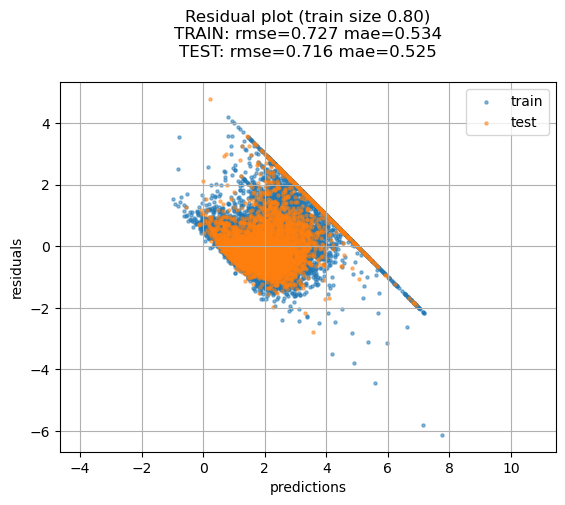

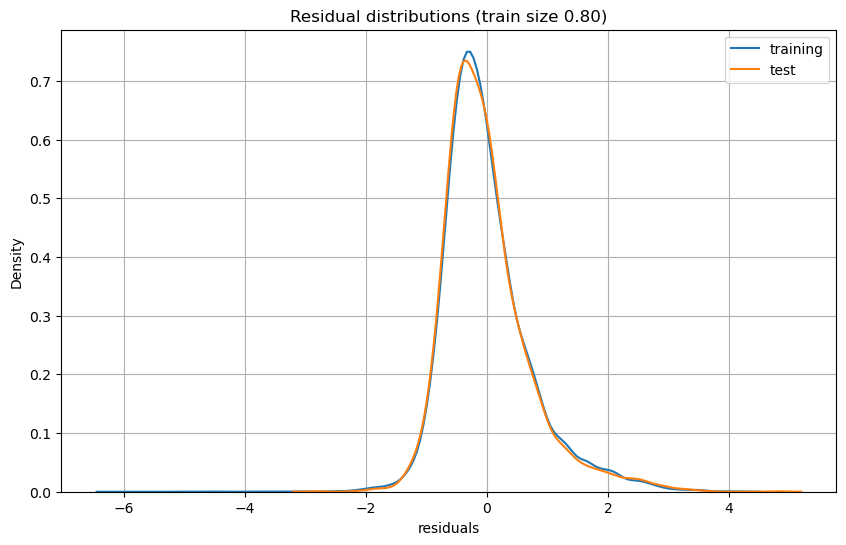

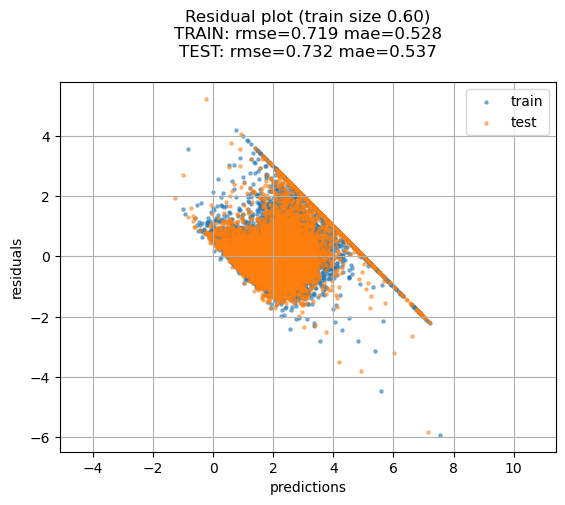

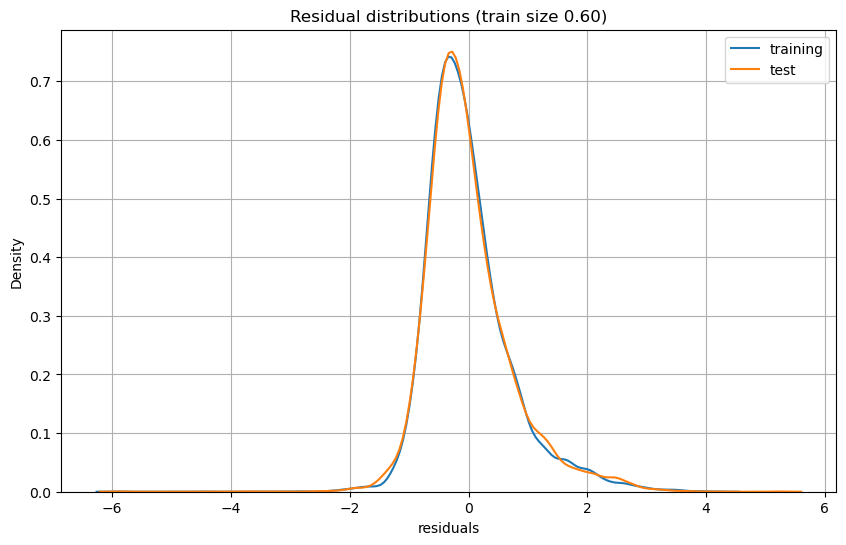

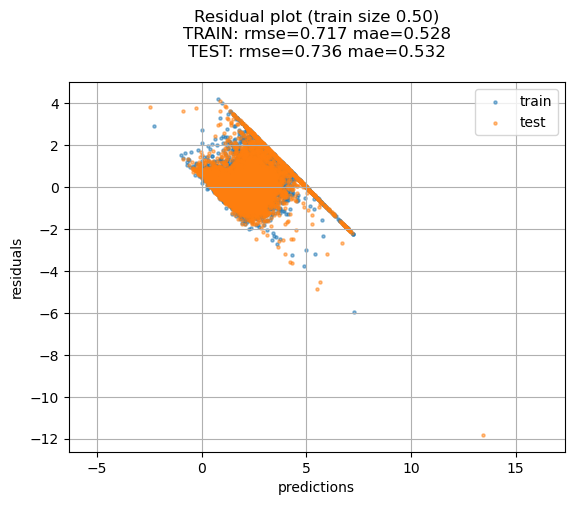

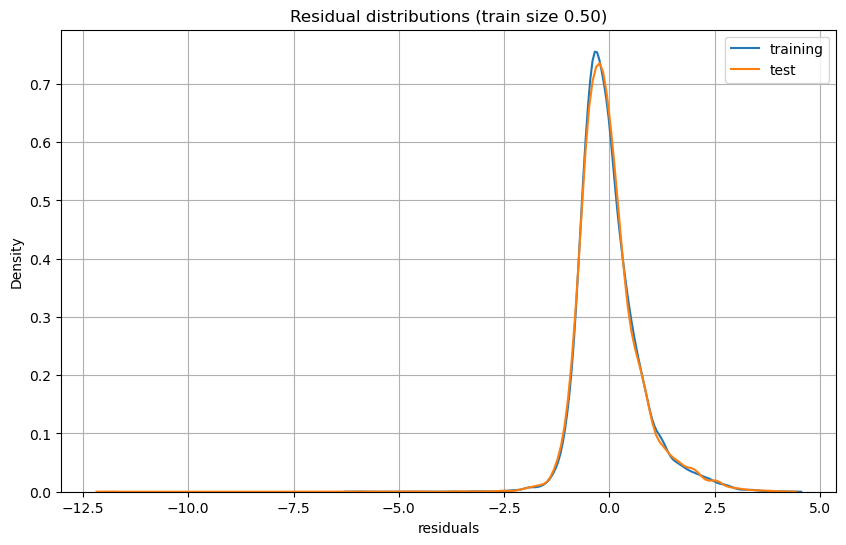


Monte Carlo run for standard linear regression (1000 split trials for each train.% in 0.75, 0.70 ... 0.50):
_____________________________________________________________________________________________________________
train              RMSE(train)                           RMSE(test)                MAE(train)    MAE(test)
-----  -----------------------------------   -----------------------------------   -----------   -----------
%      avg   std   med   IQR   min   max     avg   std   med   IQR   min   max     avg   std     avg  std
_____________________________________________________________________________________________________________
0.75   0.724 0.004 0.724 0.005 0.703 0.735   0.742 0.155 0.727 0.016 0.696 3.507   0.531 0.003   0.532 0.007 
0.70   0.723 0.005 0.724 0.006 0.696 0.736   0.755 0.219 0.727 0.014 0.696 4.290   0.531 0.004   0.532 0.006 
0.65   0.723 0.005 0.724 0.006 0.693 0.736   0.763 0.256 0.727 0.013 0.702 4.147   0.530 0.004   0.532 0.006 
0.60   0.723 0.005 

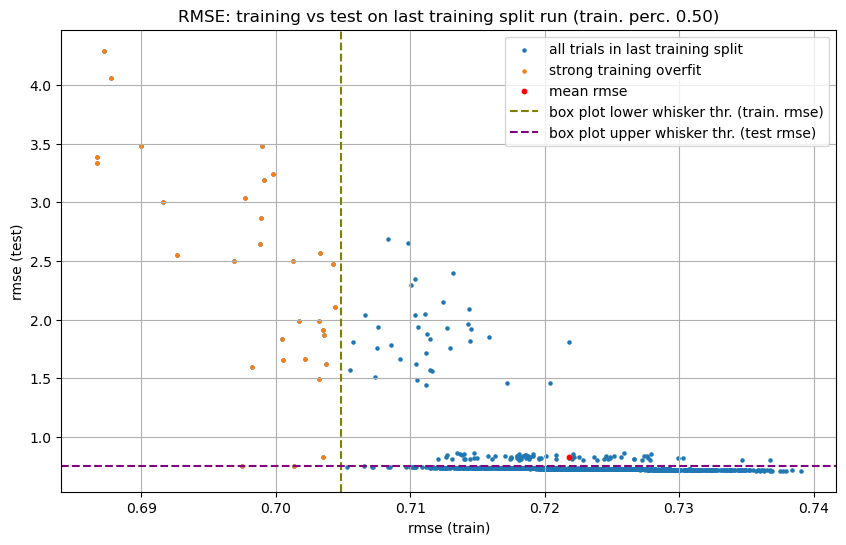

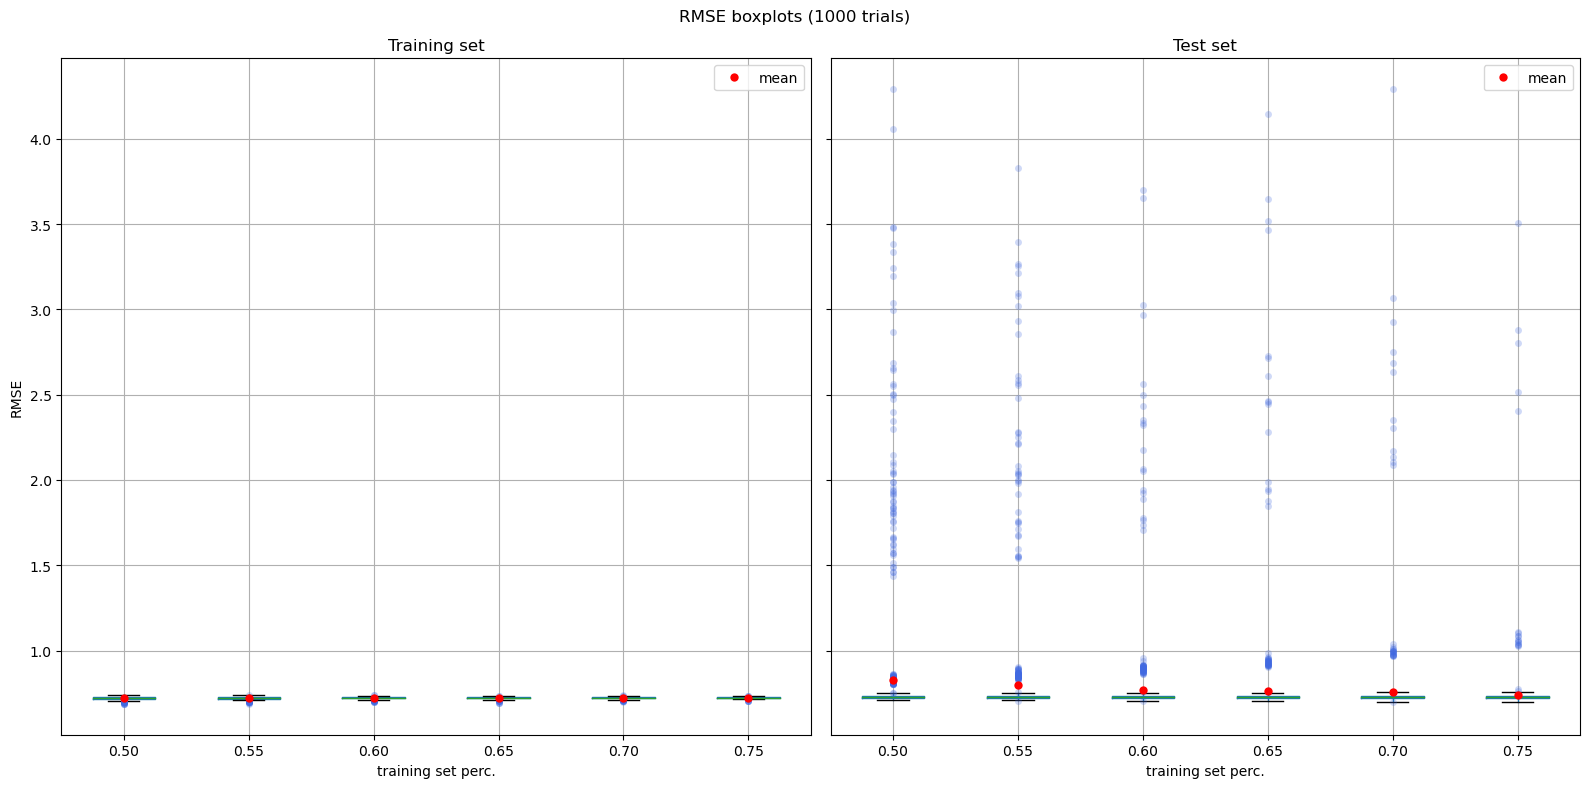

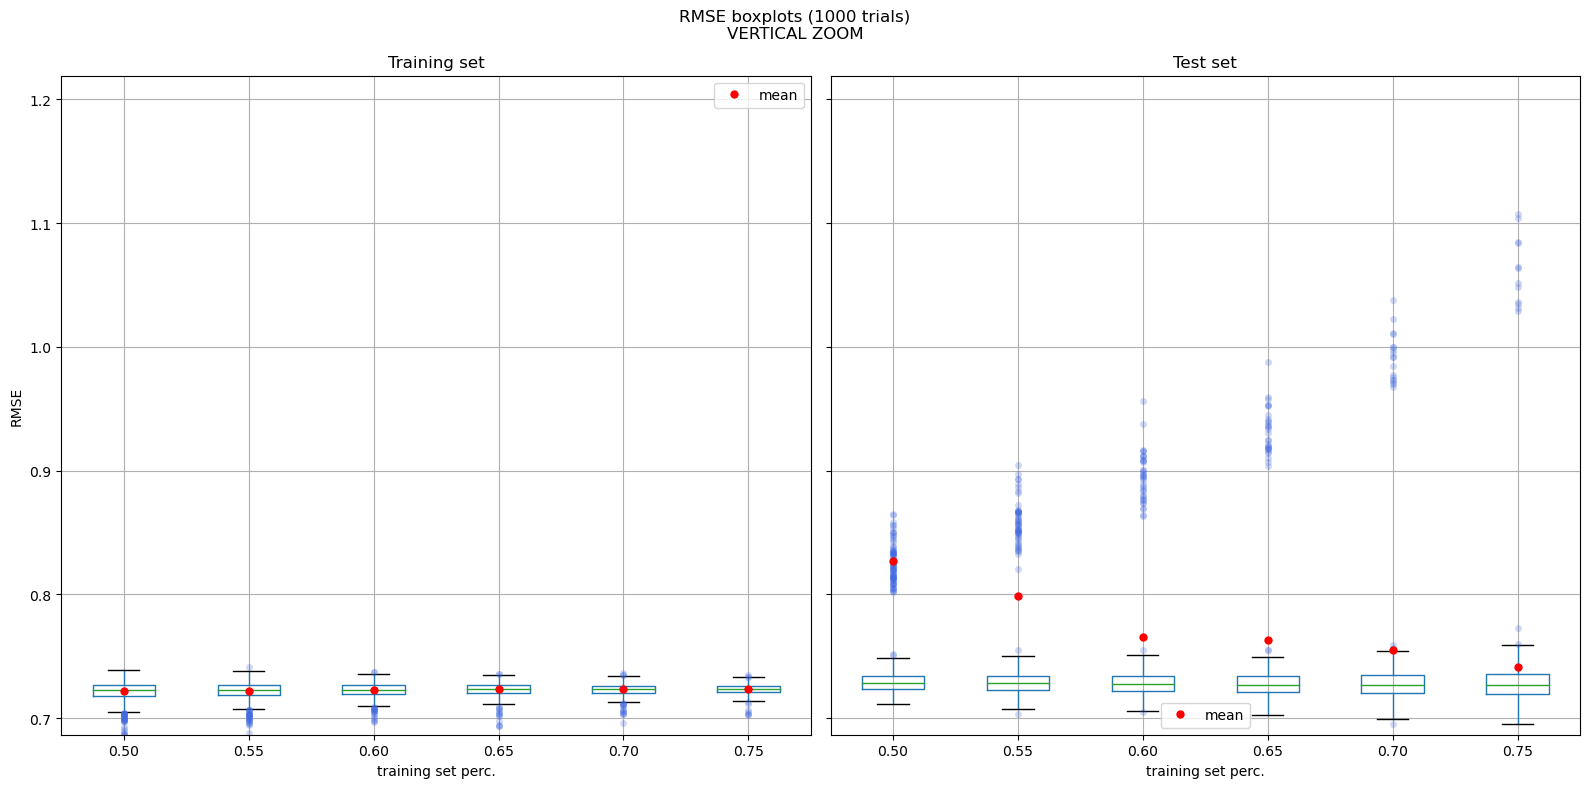

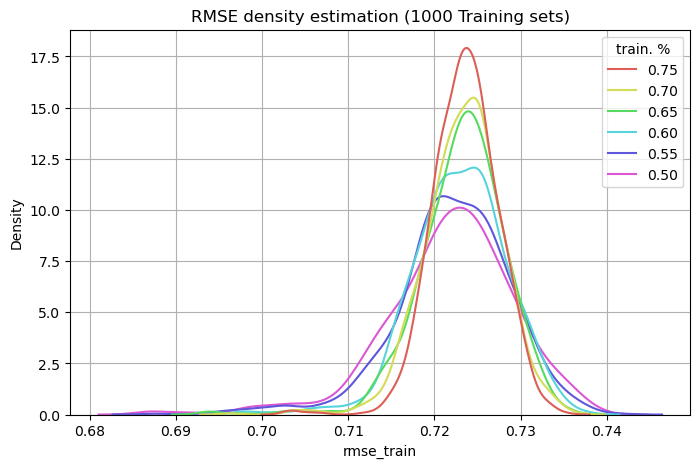

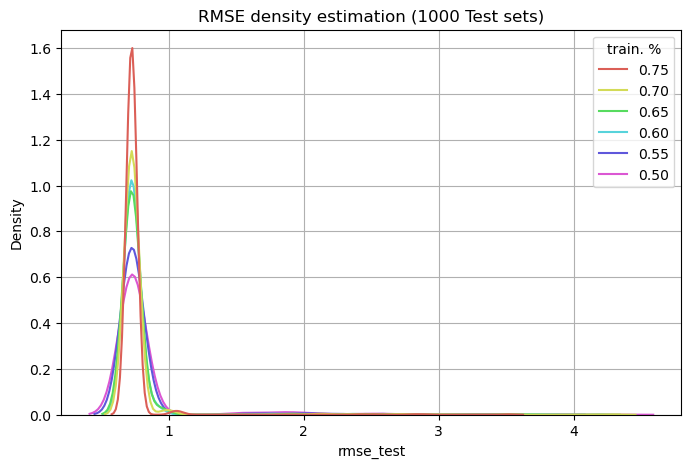

In [11]:
# Your pipeline code here.
def ResidualHistograms(prederr_train, prederr_test, subtit=""):
    plt.figure(figsize=(10, 6)) 
    sns.kdeplot(prederr_train.res, label='training')
    sns.kdeplot(prederr_test.res, label='test')
    plt.title('Residual distributions' + subtit)
    plt.xlabel('residuals')
    plt.grid()
    plt.legend()
    plt.show()

def pipeline(model, df, target, train_size=0.75, showResult=False, split_seed=None):

    if split_seed==None:
        (X_train, X_test, y_train, y_test) = train_test_split(df, target, train_size=train_size)
    else:
        (X_train, X_test, y_train, y_test) = train_test_split(df, target, train_size=train_size, random_state=split_seed)
    
    scaler = StandardScaler(); scaler.set_output(transform='pandas')
    X_train_scaled = scaler.fit_transform(X_train.values)
    X_test_scaled = scaler.transform(X_test.values)

    model.fit(X_train_scaled,y_train)

    rmse_train, mae_train = PredictionErrors(model, X_train_scaled, y_train)
    rmse_test, mae_test = PredictionErrors(model, X_test_scaled, y_test)

    if showResult:
        subtit = f" (train size {train_size:.2f})\n" +\
            f"TRAIN: rmse={rmse_train:.3f} mae={mae_train:.3f}\n" +\
                f"TEST: rmse={rmse_test:.3f} mae={mae_test:.3f}\n"
                 
        prederr_train = PredictionResidualsDF(model, X_train_scaled, y_train)
        prederr_test = PredictionResidualsDF(model, X_test_scaled, y_test)

        ResidualPlots(prederr_train, prederr_test, subtit)
        ResidualHistograms(prederr_train, prederr_test, f" (train size {train_size:.2f})")
    
    return (rmse_train, mae_train, rmse_test, mae_test)
        
        
model = LinearRegression(fit_intercept=True)
_ = pipeline(model, df, target, train_size=0.80, showResult=True) #test 0.20
_ = pipeline(model, df, target, train_size=0.60, showResult=True) #test 0.40
_ = pipeline(model, df, target, train_size=0.50, showResult=True) #test 0.50


#------------------------------------------------------------------------------------------------------------------------
# Does our model have high variance -- that is, if we fit it to a new training sample, does the result vary dramatically?
#------------------------------------------------------------------------------------------------------------------------

    # Test Monte Carlo dove la funzione pipeline è applicata per diverse percentuali di split, ognuna con N=trials diversi split del dataset
def MonteCarloTest(model, df, target, trials, perc_rg):
    print("_____________________________________________________________________________________________________________")
    print("train              RMSE(train)                           RMSE(test)                MAE(train)    MAE(test)")
    print("-----  -----------------------------------   -----------------------------------   -----------   -----------")
    print("%      avg   std   med   IQR   min   max     avg   std   med   IQR   min   max     avg   std     avg  std")
    print("_____________________________________________________________________________________________________________")
    
    Trials = trials
    columnNames = ['cat', 'train_perc', 'rmse_train', 'rmse_test', 'mae_train', 'mae_test']
    pedf = pd.DataFrame(columns=columnNames, index=range(Trials))
    for kp, perc in enumerate(perc_rg):
        for t in range(Trials):
            model = LinearRegression(fit_intercept=True)
            rmse_train_t, mae_train_t, rmse_test_t, mae_test_t = pipeline(model, df, target, train_size=perc)
            
            m = kp*Trials + t
            cat = ConvertValueToCategory(perc) #per poter raggruppare in categorie successivamente: un numero reale è poco indicato
            pedf.loc[m,'cat'] = cat
            pedf.loc[m,'train_perc'] = perc
            pedf.loc[m,'rmse_train'] = rmse_train_t
            pedf.loc[m,'rmse_test'] = rmse_test_t
            pedf.loc[m,'mae_train'] = mae_train_t
            pedf.loc[m,'mae_test'] = mae_test_t
            
        percdf = pedf[pedf['cat'] == cat]
        print(f"{cat}   \
{percdf.rmse_train.mean():.3f} \
{percdf.rmse_train.std():.3f} \
{percdf.rmse_train.quantile(0.5):.3f} \
{(percdf.rmse_train.quantile(0.75)-percdf.rmse_train.quantile(0.25)):.3f} \
{percdf.rmse_train.min():.3f} \
{percdf.rmse_train.max():.3f}   \
{percdf.rmse_test.mean():.3f} \
{percdf.rmse_test.std():.3f} \
{percdf.rmse_test.quantile(0.5):.3f} \
{(percdf.rmse_test.quantile(0.75)-percdf.rmse_test.quantile(0.25)):.3f} \
{percdf.rmse_test.min():.3f} \
{percdf.rmse_test.max():.3f}   \
{percdf.mae_train.mean():.3f} \
{percdf.mae_train.std():.3f}   \
{percdf.mae_test.mean():.3f} \
{percdf.mae_test.std():.3f} \
")
    # verifica "fit troppo buono su training set -> fit scarso su test set"
    q1 = percdf.rmse_test.quantile(0.25);  q3 = percdf.rmse_test.quantile(0.75);  thr_te = q3 + 1.5*(q3-q1)
    q1 = percdf.rmse_train.quantile(0.25); q3 = percdf.rmse_train.quantile(0.75); thr_tr = q1 - 1.5*(q3-q1)
    id_underThr_tr = percdf.rmse_train<thr_tr
    plt.figure(figsize=(10, 6))
    plt.scatter(x=percdf.rmse_train, y=percdf.rmse_test, s=5, label=f'all trials in last training split')
    plt.scatter(x=percdf.rmse_train[id_underThr_tr], y=percdf.rmse_test[id_underThr_tr], s=5, label='strong training overfit')
    plt.scatter(x=percdf.rmse_train.mean(), y=percdf.rmse_test.mean(), s=10, color='red', label='mean rmse')
    plt.axvline(x=thr_tr, color='olive',  linestyle='--', label='box plot lower whisker thr. (train. rmse)') #label='train. fit thr.')
    plt.axhline(y=thr_te, color='purple', linestyle='--', label='box plot upper whisker thr. (test rmse)') #label='test fit thr.')
    plt.xlabel('rmse (train)'); plt.ylabel('rmse (test)'); 
    plt.title(f'RMSE: training vs test on last training split run (train. perc. {cat})'); 
    plt.grid(); plt.legend()
    plt.show()

    return pedf
    
def ConvertValueToCategory(value):
    return "{:.2f}".format(value)


from scipy import stats
def BoxplotCompareTrainTestErrors(cmpdf, cols2cmp, ylab, trials, zoom_radius=0):
    ncols = 2
    nrows = 1
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8), sharey=True)
    
    outlier_props = {'marker':'o', 'markerfacecolor':'royalblue', 'markeredgewidth':0, 'markersize':5, 'alpha':0.25}
    mean_props = {'label':'mean', 'marker':'o', 'markerfacecolor':'red', 'markeredgewidth':0}
    
    cmpdf.boxplot(ax=axes[0], by ='cat', column =[cols2cmp[0]], grid = True, \
                 showmeans=True,meanprops=mean_props, flierprops=outlier_props)
    BoxplotCompareSetAxes(axes[0], ylab, 'Training set')
    BoxplotCompareSetMeanInLegend(axes[0])
    
    cmpdf.boxplot(ax=axes[1], by ='cat', column =[cols2cmp[1]],  grid = True, \
                 showmeans=True,meanprops=mean_props, flierprops=outlier_props)
    BoxplotCompareSetAxes(axes[1], "", 'Test set')
    BoxplotCompareSetMeanInLegend(axes[1])

    tit = ylab + ' boxplots (' + str(trials) +' trials)'
    if (zoom_radius>0):
        dfcolmin = min(min(cmpdf[cols2cmp[0]]), min(cmpdf[cols2cmp[1]]))
        dfcolmax = max(max(cmpdf[cols2cmp[0]]), max(cmpdf[cols2cmp[1]]))

        ymin0, ymax0 = ComputeZoomRanges(cmpdf, 'cat', cols2cmp[0], zoom_radius)
        ymin1, ymax1 = ComputeZoomRanges(cmpdf, 'cat', cols2cmp[1], zoom_radius)
        ymin = min(ymin0,ymin1)
        ymax = max(ymax0,ymax1)

        ymin = max(ymin, dfcolmin)
        ymax = min(ymax, dfcolmax)

        plt.ylim((ymin,ymax))
        tit += '\nVERTICAL ZOOM'
    
    plt.suptitle(tit)
    plt.tight_layout()
    plt.show()

def BoxplotCompareSetAxes(ax, ylab, title):
    ax.set_xlabel("training set perc."); 
    ax.set_ylabel(ylab); 
    ax.set_title(title)

def BoxplotCompareSetMeanInLegend(ax):
    handles, labels = ax.get_legend_handles_labels(); 
    ax.legend(handles[:1], labels[:1])

def ComputeZoomRanges(df, category,col, zoom_radius):
    c, r = MeanStdByGroup(df,category,col)
    #c, r = MedianMadByGroup(df,category,col)
    delta = zoom_radius*r
    inf = min(c - delta)
    sup = max(c + delta)
    return (inf, sup)

def MeanStdByGroup(df,category,col):
    grpbycat = df.groupby(category)
    means_bycategory = grpbycat[col].mean()
    stds_bycategory = grpbycat[col].std()
    return (means_bycategory, stds_bycategory)

def MedianMadByGroup(df,category,col):
    grpbycat = df.groupby(category)
    medians_bycategory = grpbycat[col].median()
    mads_bycategory = grpbycat[col].apply(lambda x: stats.median_abs_deviation(x))
    return (medians_bycategory, mads_bycategory)


Trials = 1000
perc_rg = np.arange(0.75, 0.49, -0.05)
model = LinearRegression(fit_intercept=True)

print(f"\nMonte Carlo run for standard linear regression ({Trials} split trials for each train.% in {perc_rg[0]:.2f}, {perc_rg[1]:.2f} ... {perc_rg[-1]:.2f}):")
pedf = MonteCarloTest(model, df, target, Trials, perc_rg)
print("")  
BoxplotCompareTrainTestErrors(cmpdf=pedf, cols2cmp=['rmse_train', 'rmse_test'], ylab='RMSE', trials=Trials)
BoxplotCompareTrainTestErrors(cmpdf=pedf, cols2cmp=['rmse_train', 'rmse_test'], ylab='RMSE', trials=Trials, zoom_radius=1)

plt.figure(figsize=(8, 5))
pedf = pedf.rename(columns={'cat': 'train. %'})
sns.kdeplot(data=pedf, x='rmse_train', hue='train. %', palette='hls');
plt.title(f'RMSE density estimation ({Trials} Training sets)')
plt.grid(); plt.show()
plt.figure(figsize=(8, 5))
sns.kdeplot(data=pedf, x='rmse_test', hue='train. %', palette='hls');
plt.title(f'RMSE density estimation ({Trials} Test sets)')
plt.grid(); plt.show()

## plot per MAE
#BoxplotCompareTrainTestErrors(cmpdf=pedf, cols2cmp=['mae_train', 'mae_test'], ylab='MAE', trials=Trials)
#plt.figure(figsize=(8, 5))
#sns.kdeplot(data=pedf, x='mae_train', hue='train. %', palette='hls');
#plt.title(f'MAE density estimation ({Trials} Training sets)')
#plt.grid(); plt.show()
#plt.figure(figsize=(8, 5))
#sns.kdeplot(data=pedf, x='mae_test', hue='train. %', palette='hls');
#plt.title(f'MAE density estimation ({Trials} Test sets)')
#plt.grid(); plt.show()


**Your Analysis Here**: Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

# Monte Carlo Test and Split Percentage Analysis

Most experiments (when repeatedly rerunning the cell) show **stable and similar results** even with different split percentages.

## RMSE Behavior Across Training and Test Sets

The **Monte Carlo test** highlights that the **mean RMSE on the training set** remains **almost constant** as the split percentage varies, decreasing slightly as `train_perc` decreases. However, its **variance increases** as the proportion of training data decreases.  

A similar trend is observed in:
- The **median RMSE**, which remains nearly the same regardless of the split percentage.
- The **interquartile range (IQR)**, which **increases** as the training set size decreases.

On the **test set**, the **mean RMSE is higher** and **increases** as the training set size decreases (and the test set size grows).  
The standard deviation follows the same trend as in the training set, but its values are **significantly higher** than those in the training set.  
The **median RMSE on the test set** is only slightly higher than its counterpart in the training set and remains approximately **constant**.  
However, the **IQR of the RMSE on the test set decreases** as the training set size decreases.

## Extreme Cases: 75% vs. 50% Training Split

For simplicity, considering two extreme cases (with training percentages at **75% and 50%**):

- `std(RMSE_train, tr.75%) < std(RMSE_train, tr.50%)`
- `std(RMSE_test, tr.75%) < std(RMSE_test, tr.50%)`
- `IQR(RMSE_train, tr.75%) < IQR(RMSE_train, tr.50%)`
- `IQR(RMSE_test, tr.75%) > IQR(RMSE_test, tr.50%)`

## Interpretation: Bias-Variance Tradeoff

My interpretation of the **Monte Carlo test results** is that they reflect the **bias-variance tradeoff**.  
The observed statistical behavior aligns with **overfitting** in the training set, leading to **very high RMSE on the test set**.  
As shown by the **comparison of RMSE computed across 1,000 splits at 50%**, solutions with **low RMSE in the training set** often correspond to **high RMSE in the test set**.

## Stability of MAE Across Split Percentages

For completeness, the **Mean Absolute Error (MAE)** is **much less variable** and shows **more stable** behavior across different split percentages.  
Since MAE averages the absolute errors instead of squaring the residuals, it is **less sensitive to extreme values**.  
As we transition from **75% to 50%** training data:

- The **mean MAE** is similar between the training and test sets. However:
  - It tends to **slightly decrease** in the training set.
  - It **slightly increases** in the test set.
- The **variance of MAE increases** in the training set but **decreases** in the test set.


---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

**ANSWER:** From the preliminary analysis, we observed that the **variables span very different value scales**, making it necessary to **normalize** them to have **zero mean and unit variance** using **StandardScaler**.  

Additionally, the presence of some **skewed distributions with long right tails** suggests that alternative scalers may be useful—such as **RobustScaler**, which **centers the data around the median** and **normalizes based on the interquartile range (IQR)**.

The **Monte Carlo test** conducted earlier shows that, on the **California Housing dataset**, **linear regression is generally stable** across different training sets, with only a few cases of **overfitting**. This indicates that the **model variance is low**, whereas **bias remains high** due to the **low complexity** of the model.

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

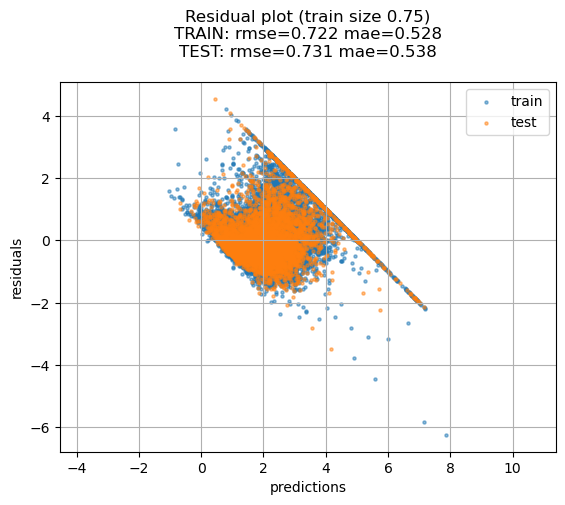

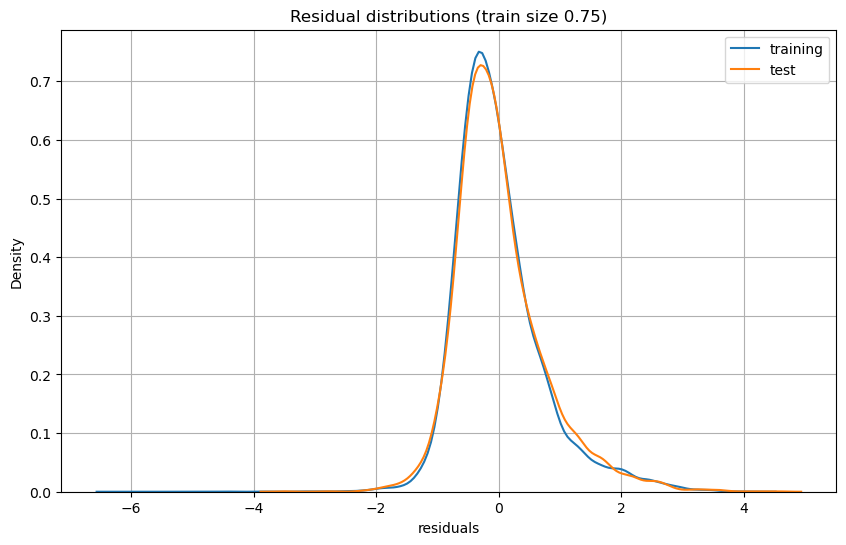

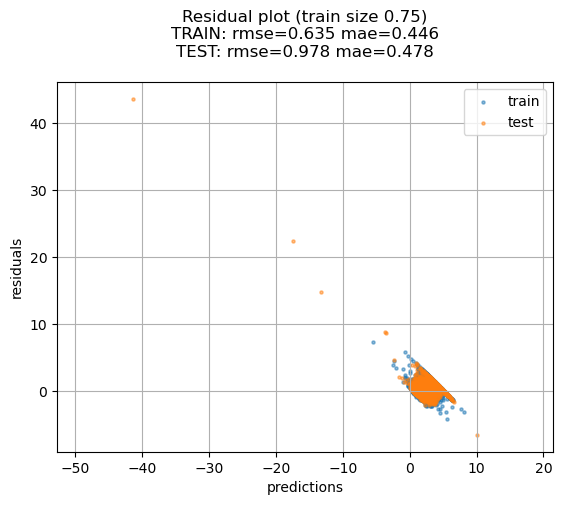

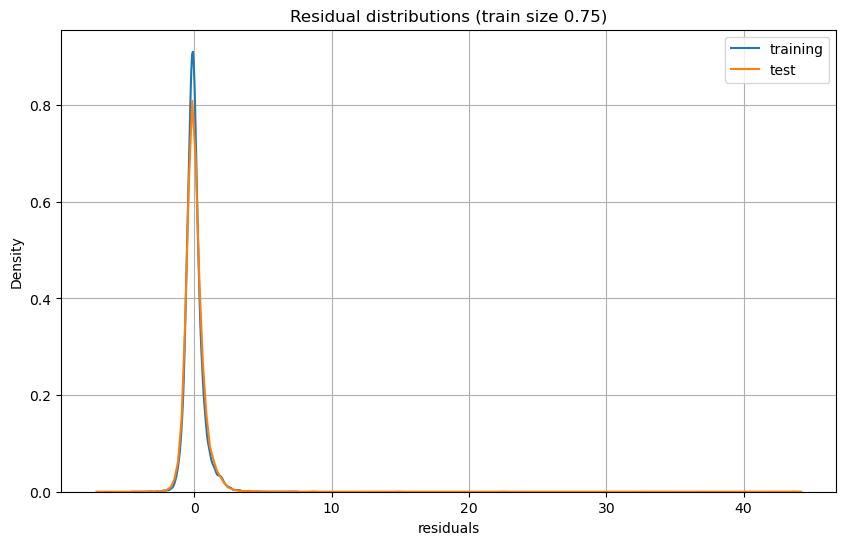

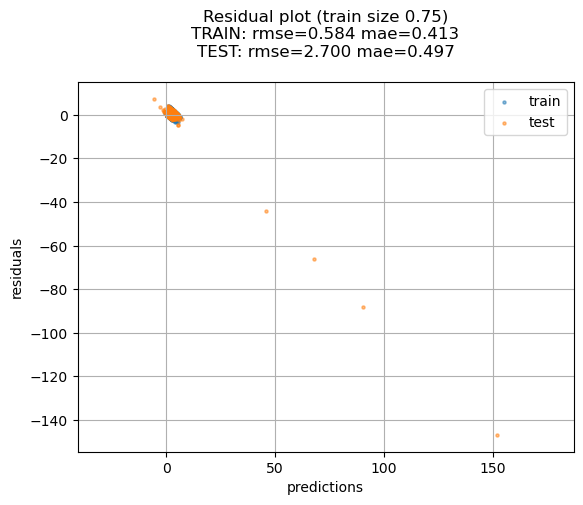

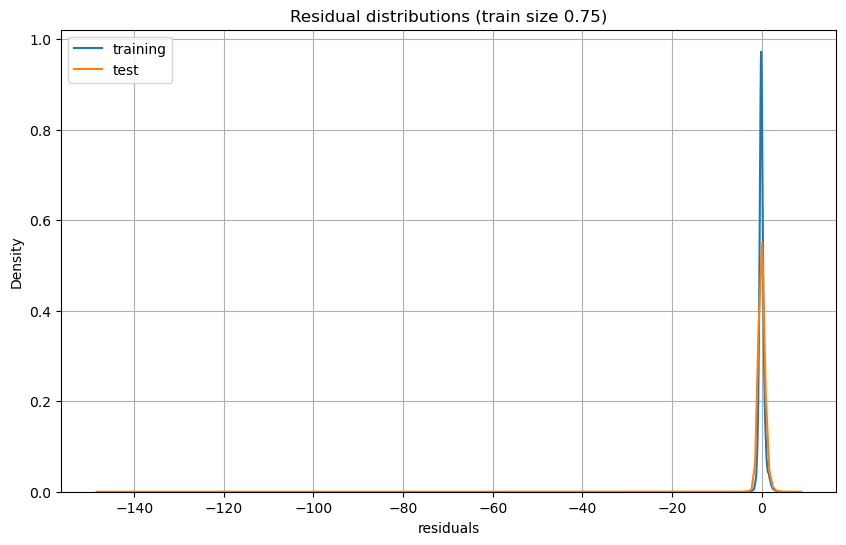

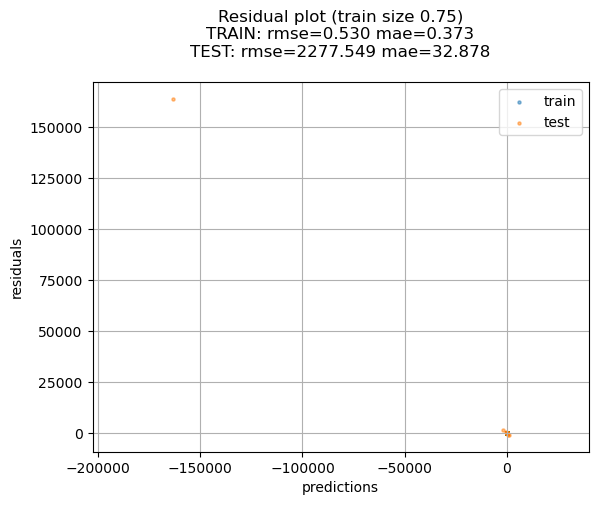

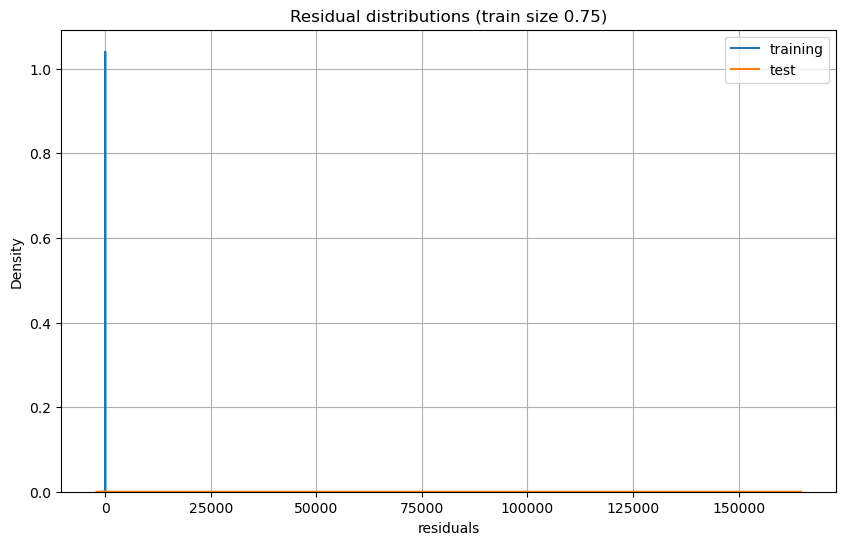

degree rmse(train.) rmse(test)
------------------------------
1      0.722        0.731
2      0.635        0.978
3      0.584        2.700
4      0.530        2277.549


In [15]:
#------------------------------------------------------------------------------------------------------------------------
# Map the independent variables onto a polynomial basis of variable order. 
# Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings
#------------------------------------------------------------------------------------------------------------------------
split_seed=11
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression(fit_intercept=True)

degree = 1
poly = PolynomialFeatures(degree,include_bias=False)
poly_data = poly.fit_transform(df)
dfp = pd.DataFrame(poly_data, columns=poly.get_feature_names_out(df.columns))
rmse_train1, mae_train1, rmse_test1, mae_test1 = pipeline(model, dfp, target, train_size=0.75, showResult=True, split_seed=split_seed)

degree = 2
poly = PolynomialFeatures(degree,include_bias=False)
poly_data = poly.fit_transform(df)
dfp = pd.DataFrame(poly_data, columns=poly.get_feature_names_out(df.columns))
rmse_train2, mae_train2, rmse_test2, mae_test2 = pipeline(model, dfp, target, train_size=0.75, showResult=True, split_seed=split_seed)

degree = 3
poly = PolynomialFeatures(degree,include_bias=False)
poly_data = poly.fit_transform(df)
dfp = pd.DataFrame(poly_data, columns=poly.get_feature_names_out(df.columns))
rmse_train3, mae_train3, rmse_test3, mae_test3 = pipeline(model, dfp, target, train_size=0.75, showResult=True, split_seed=split_seed)

degree = 4
poly = PolynomialFeatures(degree,include_bias=False)
poly_data = poly.fit_transform(df)
dfp = pd.DataFrame(poly_data, columns=poly.get_feature_names_out(df.columns))
rmse_train4, mae_train4, rmse_test4, mae_test4 = pipeline(model, dfp, target, train_size=0.75, showResult=True, split_seed=split_seed)


print("degree rmse(train.) rmse(test)")
print("------------------------------")
print(f"1      {rmse_train1:.3f}        {rmse_test1:.3f}")
print(f"2      {rmse_train2:.3f}        {rmse_test2:.3f}")
print(f"3      {rmse_train3:.3f}        {rmse_test3:.3f}")
print(f"4      {rmse_train4:.3f}        {rmse_test4:.3f}")

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?


By PipelineLinPolyCV:
degree:1 folder_score[0]:0.745
degree:1 folder_score[1]:0.722
degree:1 folder_score[2]:0.722
degree:1 folder_score[3]:0.708
degree:1 folder_score[4]:0.734
degree:1 rmse_cv:0.7262202549154451
degree:2 folder_score[0]:11.455
degree:2 folder_score[1]:0.647
degree:2 folder_score[2]:0.653
degree:2 folder_score[3]:0.629
degree:2 folder_score[4]:1.489
degree:2 rmse_cv:2.974462952931578
degree:3 folder_score[0]:935.111
degree:3 folder_score[1]:0.649
degree:3 folder_score[2]:2.459
degree:3 folder_score[3]:0.670
degree:3 folder_score[4]:5.077
degree:3 rmse_cv:188.7931881007485
degree:4 folder_score[0]:5054666.247
degree:4 folder_score[1]:4.233
degree:4 folder_score[2]:146.300
degree:4 folder_score[3]:1.614
degree:4 folder_score[4]:92183.745
degree:4 rmse_cv:1029400.4277334627
degree:5 folder_score[0]:868046781.815
degree:5 folder_score[1]:157.979
degree:5 folder_score[2]:3046.467
degree:5 folder_score[3]:138.058
degree:5 folder_score[4]:13623085.190
degree:5 rmse_cv:176334

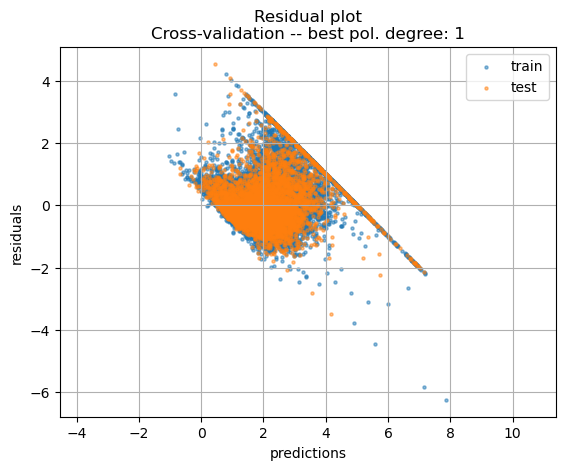

In [13]:
# Your code here.
def ComputeRmse(res):
    return math.sqrt(np.mean(res**2))


from sklearn.model_selection import KFold

class PipelineLinPolyCV:
# classe che implementa "manualmente" la cross-validation per il grado della base polinomiale
    
    def __init__(self, poly, scaler, model):
        self.poly = poly
        self.scaler = scaler
        self.model = model
        
        
    def SetDataset(self, df, target, train_size, split_seed):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(df, target, train_size=train_size, random_state=split_seed)


    def FitPolydataCV(self, degrees, cv_folders):
        # selezione grado polin. tramite Cross-Validation
        best_deg = self.FindDegreeByCV(degrees, cv_folders)
        # applico il polinomio all'intero training set
        self.poly.degree = best_deg
        dfp = self.ApplyPoly(self.X_train)
        # fit sull'intero training set
        self.PipelineTrain(dfp, self.y_train)
        
    
    def  FindDegreeByCV(self, degrees, cv_folders):
        deg_cvscore = np.zeros(len(degrees))*math.nan
        for kdeg, deg in enumerate(degrees):
            deg_cvscore[kdeg] = self.PipelineCV(deg, cv_folders)
            print(f"degree:{deg} rmse_cv:{deg_cvscore[kdeg]}")
        idbest = np.argmin(deg_cvscore)
        return degrees[idbest]
        
        
    def PipelineCV(self, degree, cv_folders):
        self.poly.degree = degree
        dfp = self.ApplyPoly(self.X_train)
        
        f = 0
        folder_score = np.zeros(cv_folders)*math.nan
        kf = KFold(n_splits=cv_folders, shuffle=False)
        for train, test in kf.split(dfp):
        
            Xtr = dfp.iloc[train]
            Xte = dfp.iloc[test]
            ytr = self.y_train.iloc[train]
            yte = self.y_train.iloc[test]
            
            self.PipelineTrain(Xtr, ytr)
            res_te = yte-self.Predict(Xte)
            
            folder_score[f] = ComputeRmse(res_te); 
            print(f"degree:{degree} folder_score[{f}]:{folder_score[f]:.3f}")
            f=f+1
        
        cvscore = folder_score.mean()
        return cvscore
    

    def ApplyPoly(self, df):
        poly_data = self.poly.fit_transform(df)
        dfp = pd.DataFrame(poly_data, columns=self.poly.get_feature_names_out(df.columns))
        return dfp


    def PipelineTrain(self, X_train, y_train):
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled,y_train)

    
    def Predict(self, df):
        df_scaled = self.scaler.transform(df)
        pred = self.model.predict(df_scaled)
        return pred

    #@staticmethod
    #def ComputeRmse(res):
    #    return math.sqrt(sum(res**2)/len(res))

    
    def GetTrainingSet(self):
        return (self.X_train, self.y_train)

    
    def GetTestSet(self):
        return (self.X_test, self.y_test)

#----------------------------------------------------------------------------
#                                      MAIN
#----------------------------------------------------------------------------
train_size = 0.75
cv_folders = 5
degrees = np.arange(1,6,1)

scaler = StandardScaler(); scaler.set_output(transform='pandas')
model = LinearRegression(fit_intercept=True)
# se il modello lineare prevede di stimare w_0, 
# non è necessario produrre il termine di ordine 0 del polinomio
poly = PolynomialFeatures(include_bias=False)

print("\nBy PipelineLinPolyCV:")
mypipeln = PipelineLinPolyCV(poly, scaler, model)
mypipeln.SetDataset(df, target, train_size, split_seed)
mypipeln.FitPolydataCV(degrees, cv_folders)

print("\nModel parameters")
print(model.coef_)


#-----------------------------------------------------------------------------
# impiego di strumenti già pronti: sklearn GridSearchCV + Pipeline
#
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

print("\nBy sklearn GridSearchCV + Pipeline:")

# definisco la pipeline come l'applicazione in sequenza della base polinomiale, lo scaler e lo stimatore lineare
steps = [
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('linReg', LinearRegression(fit_intercept=True))
]
pipeln = Pipeline(steps)

# definisco i gradi da valutare con GridSearchCV come iperparametro
param_grid = {
    'poly__degree': degrees
}
grid_search = GridSearchCV(pipeln, param_grid, cv=cv_folders, verbose=4,
                           scoring='neg_root_mean_squared_error')

# recupero i dati splittati da PipelineLinPolyCV.SetDataset
X_train, y_train = mypipeln.GetTrainingSet()
X_test, y_test = mypipeln.GetTestSet()

# lancio la ricerca del grado ottimale
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("\nModel parameters")
print(best_model['linReg'].coef_)
#
pred_train = best_model.predict(X_train); res_train = y_train - pred_train; rmse_train = ComputeRmse(res_train)
pred_test  = best_model.predict(X_test);  res_test  = y_test - pred_test;   rmse_test  = ComputeRmse(res_test)
print(f"\nrmse_train:{rmse_train}  rmse_test:{rmse_test}")
#
ResidualPlots(pd.DataFrame({'pred': pred_train, 'res': res_train}), 
              pd.DataFrame({'pred': pred_test, 'res': res_test}), 
              f"\nCross-validation -- best pol. degree: {best_model['poly'].degree}")


**Your Final Analysis Here**: Summarize the conclusions you can make about the best hyperparameter settings for this dataset. How do you know your conclusions are supported by the data?

La cross-validazione ha individuato nel grado 1 della base polinomiale il miglior iperparametro, producendo errori mediamente maggiori negli altri gradi: tale valore trova riscontro anche nei test prelimiari sull'intero training set contrapposto al test set: seppur legati ad una particolare partizione dell'intero dataset, il grado 1 è supportato anche dall'errore RMSE paragonabile osservato tra training test e test set; viceversa, lo rmse sul test set per il grado due sul test set inizia già a salire per il grado 2, per poi esplodere sui gradi superiori (mentre lo RMSE sul training set diminuisce al crescere del grado).

Poiché per un polinomio di grado $M$ in $D$ variabili i coefficienti crescono in numero come $D^M$, l'aumento del grado nella base polinomiale produce un numero elevato di nuove variabili, i cui gradi di libertà comportano un eccessivo overfitting sul training set finendo con il modellare il rumore invece che la miglior funzione di predizione.

# Polynomial Degree Selection and Overfitting

Cross-validation has identified **degree 1** as the best hyperparameter for the polynomial basis, with higher degrees producing **consistently larger errors** on average.  
This finding is also supported by **preliminary tests on the full training set vs. the test set**: although tied to a specific partition of the dataset, **degree 1 is further validated by the comparable RMSE observed between the training and test sets**.  
Conversely, the **RMSE on the test set for degree 2 already begins to increase**, and then **escalates drastically for higher degrees**, whereas the **RMSE on the training set decreases** as the degree increases.

## Overfitting and Complexity Growth

Since for a polynomial of **degree $M$ in $D$ variables**, the number of coefficients grows as **$D^M$**, increasing the polynomial basis degree **introduces a large number of new variables**.  
The added degrees of freedom lead to **excessive overfitting** on the training set, causing the model to **fit noise rather than optimizing the true predictive function**.
